<img src="credito.jpg" />

<center><h1 Style="color:#007696">Machine Learning</h1></center>
<center><h5>Universidad Castro Carazo</h5> </center>
<center><h6>2C - 2023</h6> </center>
<center><h6>Jeffry Cordero Mejía</h6> </center>
</br>
<center><h6 Style="color:#20a5d8">Contexto del problema</h6> </center>
<p Style="text-align: justify"> Este notebook contiene el análisis de un set de datos de la entidad financiera Banco Uno.
En el último año se ha detectado la materialización del riesgo de incumplimiento de los compromisos financieros por parte de los clientes, que han tramitado algún tipo de préstamo en la institución. Lo anterior expone a Banco Uno a un detrimento en la calificación crediticia del ante las autoridades reguladoras, motivo que podría generar la pérdida de clientes o negocios en un futuro, razón por la cual es importante resolver el problema y de esta forma mantener el estatus ante los entes reguladores. Luego de un detallado análisis del escenario antes planteado, se llegó a la conclusión de que es necesario un mecanismo que permita identificar el monto a prestar a un cliente, o en su efecto si se debe otorgar el crédito o no, para lo cual se ha decidido emprender un proyecto de ciencia de datos cuyo objetivo es diseñar e implementar una solución mediante el cual se
facilite la toma de decisiones respecto a al proceso de otorgamiento de créditos. En razón de lo anterior, se le solicita efectuar una exploración del set de datos que proporcionará la entidad bancaria, diseñe los algoritmos, y prepare los modelos que estime necesario. Le recordamos que sentido de este proyecto es lograr determinar si un crédito debe ser otorgado o no.</p>
<center><h6 Style="color:#20a5d8">Planteamiento del problema</h6> </center>
</br>
<p Style="text-align: justify"> Determinar los factores que influyen de manera significativa en el otorgamiento de un crédito a clientes solicitantes logrando definir cuáles clientes califican o no para un préstamo, así como los montos asignados según las capacidades de pago.</p>
</br>
<center><h6 Style="color:#20a5d8">Objetivo</h6> </center>
</br>
<p Style="text-align: justify"> Generar un algoritmo de predicción que permita determinar el monto a prestar a un cliente solicitante de acuerdo a un estudio de características claves a analizar en el individuo con las cuales se pueda evaluar el riesgo de incumplimiento de pago con la entidad financiera Banco Uno.</p>
</br>
<center><h6 Style="color:#20a5d8">Hipótesis</h6> </center>
<ol>
   <li>Influye el grado de educación en la obtención de un crédito?</li>
   <li>Influye el estado civil del cliente en la obtención de un crédito?</li>
   <li>Influye el género del cliente en la obtención de un crédito?</li>
   <li>Influye el historial de pagos pasados en la obtención de un crédito?</li>
   <li>Influye el estudio de montos de facturas en la obtención de un crédito?</li>
</ol>
</br>


<center><h6 Style="color:#20a5d8"> Conociendo los datos y el dominio</h6> </center>
<p Style="text-align: justify"> Esta investigación empleó una variable binaria, pago predeterminado (Sí = 1, No = 0), como variable de respuesta. Este estudio revisó la literatura y utilizó las siguientes 23 variables como variables explicativas: 
X1: Monto del crédito otorgado (dólar NT): incluye tanto al consumidor individual crédito y su crédito familiar (complementario). 
X2: Género (1 = masculino; 2 = femenino).
X3: Educación (1 = posgrado; 2 = universidad; 3 = bachillerato; 0, 4, 5, 6 = otros). X4: Estado civil (1 = casado; 2 = soltero; 3 = divorciado; 0 = otros).
X5: Edad (año).
X6 - X11: Historial de pagos pasados. Realizamos un seguimiento de los últimos registros de pagos mensuales (desde Abril a septiembre de 2005) de la siguiente manera: X6 = el estado de reembolso en septiembre de 2005; X7 = el estado de reembolso en agosto de 2005; . . .; X11 = el estado de reembolso en abril de 2005.
La escala de medición para el estado de reembolso es:2: Sin consumo; -1: pagado en su totalidad; 0: El uso de crédito renovable; 1 = retraso en el pago por un mes; 2 = retraso en el pago de dos meses; . . .; 8 = retraso en el pago de ocho meses; 9 = retraso en el pago de nueve meses o más.
X12-X17: Monto del extracto de la factura (dólar NT). X12 = monto del extracto de la factura en Septiembre de 2005; X13 = monto del estado de cuenta en agosto de 2005; . . .; X17 = cantidad de estado de cuenta en abril de 2005.X18-X23: Monto del pago anterior (dólar NT). 
X18 = monto pagado en septiembre, 2005; X19 = monto pagado en agosto de 2005; . . .; X23 = monto pagado en abril de 2005.
Y: comportamiento del cliente; Y = 0 entonces no predeterminado, Y = 1 luego predeterminado</p>


<h3 Style="color:#006aa5">1.Carga y depuración los set de datos</h3>
</br>

<ol>
   <li>Importar las librerías de Python necesarias</li>
   <li>Importar el set de datos</li>
    <li>Renombrar columnas en el set de datos</li>
   <li>Revisar que no hayan valores faltantes</li>
   
</ol>

**Exportación de bibliotecas y Análisis Exploratorio de los datos**

In [1]:
from sqlalchemy import create_engine
import pymysql
import pandas as pd
import numpy as np
import sklearn
from sklearn import linear_model
import sklearn.linear_model as lm
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import matplotlib as mpl
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.decomposition import PCA
import statsmodels.api as sm
import warnings
warnings.filterwarnings("ignore")

In [2]:
connection = pymysql.connect(host='data-analytics-2018.cbrosir2cswx.us-east-1.rds.amazonaws.com',
user='deepAnalytics',
password='Sqltask1234!',
database='Credit',
charset='utf8mb4',
cursorclass=pymysql.cursors.DictCursor)

In [3]:
df = pd.read_sql('SELECT * FROM credit', con=connection) #Importación de archivo

In [4]:
df. to_csv ( "BancoUno.csv" , header = False , index = False) #Importación de archivo: encabezados y filas

In [5]:
df.head(5)

X1      X2          X3        X4   X5     X6     X7     X8     X9  \
0  LIMIT_BAL     SEX   EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  PAY_4   
1      20000  female  university         1   24      2      2     -1     -1   
2     120000  female  university         2   26     -1      2      0      0   
3      90000  female  university         2   34      0      0      0      0   
4      50000  female  university         1   37      0      0      0      0   

     X10  ...        X15        X16        X17       X18       X19       X20  \
0  PAY_5  ...  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  PAY_AMT3   
1     -2  ...          0          0          0         0       689         0   
2      0  ...       3272       3455       3261         0      1000      1000   
3      0  ...      14331      14948      15549      1518      1500      1000   
4      0  ...      28314      28959      29547      2000      2019      1200   

        X21       X22       X23                           Y  
0  PAY_AMT4  PAY_AMT5  PAY_AMT6  default payment next month  
1         0         0         0                     default  
2      1000         0      2000                     default  
3      1000      1000      5000                 not default  
4      1100      1069      1000                 not default  

[5 rows x 24 columns]

In [6]:
df.columns.values # VIsualizo las etiquetas de las columnas

array(['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9', 'X10', 'X11',
       'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18', 'X19', 'X20',
       'X21', 'X22', 'X23', 'Y'], dtype=object)

In [7]:
df.shape # reviso la cantidad de filas y columnas

(3670, 24)

In [8]:
df.info() # reviso los tipos de datos del archivo

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3670 entries, 0 to 3669
Data columns (total 24 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   X1      3670 non-null   object
 1   X2      3670 non-null   object
 2   X3      3670 non-null   object
 3   X4      3670 non-null   object
 4   X5      3670 non-null   object
 5   X6      3670 non-null   object
 6   X7      3670 non-null   object
 7   X8      3670 non-null   object
 8   X9      3670 non-null   object
 9   X10     3670 non-null   object
 10  X11     3670 non-null   object
 11  X12     3670 non-null   object
 12  X13     3670 non-null   object
 13  X14     3670 non-null   object
 14  X15     3670 non-null   object
 15  X16     3670 non-null   object
 16  X17     3670 non-null   object
 17  X18     3670 non-null   object
 18  X19     3670 non-null   object
 19  X20     3670 non-null   object
 20  X21     3670 non-null   object
 21  X22     3670 non-null   object
 22  X23     3670 non-null   

In [9]:
df_Null = df.isnull() #revisión previa de valores nulos o faltantes
df_Null.head(5)

X1     X2     X3     X4     X5     X6     X7     X8     X9    X10  ...  \
0  False  False  False  False  False  False  False  False  False  False  ...   
1  False  False  False  False  False  False  False  False  False  False  ...   
2  False  False  False  False  False  False  False  False  False  False  ...   
3  False  False  False  False  False  False  False  False  False  False  ...   
4  False  False  False  False  False  False  False  False  False  False  ...   

     X15    X16    X17    X18    X19    X20    X21    X22    X23      Y  
0  False  False  False  False  False  False  False  False  False  False  
1  False  False  False  False  False  False  False  False  False  False  
2  False  False  False  False  False  False  False  False  False  False  
3  False  False  False  False  False  False  False  False  False  False  
4  False  False  False  False  False  False  False  False  False  False  

[5 rows x 24 columns]

In [10]:
for column in df_Null.columns.values.tolist():
    print(column)
    print(df_Null[column].value_counts())
    print("")

X1
False    3670
Name: X1, dtype: int64

X2
False    3670
Name: X2, dtype: int64

X3
False    3670
Name: X3, dtype: int64

X4
False    3670
Name: X4, dtype: int64

X5
False    3670
Name: X5, dtype: int64

X6
False    3670
Name: X6, dtype: int64

X7
False    3670
Name: X7, dtype: int64

X8
False    3670
Name: X8, dtype: int64

X9
False    3670
Name: X9, dtype: int64

X10
False    3670
Name: X10, dtype: int64

X11
False    3670
Name: X11, dtype: int64

X12
False    3670
Name: X12, dtype: int64

X13
False    3670
Name: X13, dtype: int64

X14
False    3670
Name: X14, dtype: int64

X15
False    3670
Name: X15, dtype: int64

X16
False    3670
Name: X16, dtype: int64

X17
False    3670
Name: X17, dtype: int64

X18
False    3670
Name: X18, dtype: int64

X19
False    3670
Name: X19, dtype: int64

X20
False    3670
Name: X20, dtype: int64

X21
False    3670
Name: X21, dtype: int64

X22
False    3670
Name: X22, dtype: int64

X23
False    3670
Name: X23, dtype: int64

Y
False    3670
Name: Y, dtyp

In [11]:
df_Null.isnull().sum().sum()

0

In [12]:
study_credit = df

In [13]:
study_credit.head(10)

X1      X2               X3        X4   X5     X6     X7     X8  \
0  LIMIT_BAL     SEX        EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3   
1      20000  female       university         1   24      2      2     -1   
2     120000  female       university         2   26     -1      2      0   
3      90000  female       university         2   34      0      0      0   
4      50000  female       university         1   37      0      0      0   
5      50000    male       university         1   57     -1      0     -1   
6      50000    male  graduate school         2   37      0      0      0   
7     500000    male  graduate school         2   29      0      0      0   
8     100000  female       university         2   23      0     -1     -1   
9     140000  female      high school         1   28      0      0      2   

      X9    X10  ...        X15        X16        X17       X18       X19  \
0  PAY_4  PAY_5  ...  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2   
1     -1     -2  ...          0          0          0         0       689   
2      0      0  ...       3272       3455       3261         0      1000   
3      0      0  ...      14331      14948      15549      1518      1500   
4      0      0  ...      28314      28959      29547      2000      2019   
5      0      0  ...      20940      19146      19131      2000     36681   
6      0      0  ...      19394      19619      20024      2500      1815   
7      0      0  ...     542653     483003     473944     55000     40000   
8      0      0  ...        221       -159        567       380       601   
9      0      0  ...      12211      11793       3719      3329         0   

        X20       X21       X22       X23                           Y  
0  PAY_AMT3  PAY_AMT4  PAY_AMT5  PAY_AMT6  default payment next month  
1         0         0         0         0                     default  
2      1000      1000         0      2000                     default  
3      1000      1000      1000      5000                 not default  
4      1200      1100      1069      1000                 not default  
5     10000      9000       689       679                 not default  
6       657      1000      1000       800                 not default  
7     38000     20239     13750     13770                 not default  
8         0       581      1687      1542                 not default  
9       432      1000      1000      1000                 not default  

[10 rows x 24 columns]

In [14]:
study_credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3670 entries, 0 to 3669
Data columns (total 24 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   X1      3670 non-null   object
 1   X2      3670 non-null   object
 2   X3      3670 non-null   object
 3   X4      3670 non-null   object
 4   X5      3670 non-null   object
 5   X6      3670 non-null   object
 6   X7      3670 non-null   object
 7   X8      3670 non-null   object
 8   X9      3670 non-null   object
 9   X10     3670 non-null   object
 10  X11     3670 non-null   object
 11  X12     3670 non-null   object
 12  X13     3670 non-null   object
 13  X14     3670 non-null   object
 14  X15     3670 non-null   object
 15  X16     3670 non-null   object
 16  X17     3670 non-null   object
 17  X18     3670 non-null   object
 18  X19     3670 non-null   object
 19  X20     3670 non-null   object
 20  X21     3670 non-null   object
 21  X22     3670 non-null   object
 22  X23     3670 non-null   

<h3 Style ="color:#6495ED">2.Estandarizar de datos</h3>
</br>
<ol>
    <li>Renombrar las columnas con la información solicitada en la semana 4 del entorno(información conjunto de datos)</li>
    <li>Se convierten los datos mediante los métodos: astype y map (de variables categóricas a númerica)</li>
    <li>Se eliminan duplicados</li>

<ol>

**Estandarización de la información y depuración de datos**

In [15]:
study_credit.rename({"X1":"Crédito_otorgado", "X2":"Género", "X3": "Educación", "X4": "Estado_civil", "X5": "Edad",
               "X6":"HPSEP05", "X7": "HPAG05", "X8": "HPJL05", "X9": "HPJN05", "X10": "HPMY05", "X11": "HPABR05","X12": "MFSEP05",
               "X13": "MFAG05", "X14": "MFJL05","X15": "MFJN05","X16": "MFMY05", "X17": "MFABR05","X18" : "MPASEP05",
               "X19" : "MPA_AG05","X20" : "MPAJL05", "X21" : "MPAJN05", "X22" : "MPAMY05", "X23" : "MPA_ABR05", "Y":"Comportamiento_cliente"},
              axis = 1, inplace = True) # renombro las columnas de acuerdo a lo que indica la información de atributos-semana4

In [16]:
study_credit.head() #reviso el cambio

Crédito_otorgado  Género   Educación Estado_civil Edad HPSEP05 HPAG05  \
0        LIMIT_BAL     SEX   EDUCATION     MARRIAGE  AGE   PAY_0  PAY_2   
1            20000  female  university            1   24       2      2   
2           120000  female  university            2   26      -1      2   
3            90000  female  university            2   34       0      0   
4            50000  female  university            1   37       0      0   

  HPJL05 HPJN05 HPMY05  ...     MFJN05     MFMY05    MFABR05  MPASEP05  \
0  PAY_3  PAY_4  PAY_5  ...  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1   
1     -1     -1     -2  ...          0          0          0         0   
2      0      0      0  ...       3272       3455       3261         0   
3      0      0      0  ...      14331      14948      15549      1518   
4      0      0      0  ...      28314      28959      29547      2000   

   MPA_AG05   MPAJL05   MPAJN05   MPAMY05 MPA_ABR05  \
0  PAY_AMT2  PAY_AMT3  PAY_AMT4  PAY_AMT5  PAY_AMT6   
1       689         0         0         0         0   
2      1000      1000      1000         0      2000   
3      1500      1000      1000      1000      5000   
4      2019      1200      1100      1069      1000   

       Comportamiento_cliente  
0  default payment next month  
1                     default  
2                     default  
3                 not default  
4                 not default  

[5 rows x 24 columns]

In [17]:
study_credit.dtypes # reviso tipo de datos

Crédito_otorgado          object
Género                    object
Educación                 object
Estado_civil              object
Edad                      object
HPSEP05                   object
HPAG05                    object
HPJL05                    object
HPJN05                    object
HPMY05                    object
HPABR05                   object
MFSEP05                   object
MFAG05                    object
MFJL05                    object
MFJN05                    object
MFMY05                    object
MFABR05                   object
MPASEP05                  object
MPA_AG05                  object
MPAJL05                   object
MPAJN05                   object
MPAMY05                   object
MPA_ABR05                 object
Comportamiento_cliente    object
dtype: object

In [18]:
study_credit.drop([0]) # Elimino la fila cero que contiene la información anterior de etiquetas

Crédito_otorgado  Género    Educación Estado_civil Edad HPSEP05 HPAG05  \
1               20000  female   university            1   24       2      2   
2              120000  female   university            2   26      -1      2   
3               90000  female   university            2   34       0      0   
4               50000  female   university            1   37       0      0   
5               50000    male   university            1   57      -1      0   
...               ...     ...          ...          ...  ...     ...    ...   
3665           220000  female   university            1   32       0      0   
3666            70000  female   university            2   34       1      2   
3667           120000    male   university            2   37      -1      2   
3668           180000  female   university            2   32       0      0   
3669            50000  female  high school            1   57       0      0   

     HPJL05 HPJN05 HPMY05  ...  MFJN05  MFMY05 MFABR05 MPASEP05 MPA_AG05  \
1        -1     -1     -2  ...       0       0       0        0      689   
2         0      0      0  ...    3272    3455    3261        0     1000   
3         0      0      0  ...   14331   14948   15549     1518     1500   
4         0      0      0  ...   28314   28959   29547     2000     2019   
5        -1      0      0  ...   20940   19146   19131     2000    36681   
...     ...    ...    ...  ...     ...     ...     ...      ...      ...   
3665      0      0      0  ...  208355  213015  217475     7200     9000   
3666      2      2      0  ...   26456   28361   31873     1500     2900   
3667      0      0      0  ...   17901   19608   19143     1000     1600   
3668      0      0      0  ...   31057   29052   25933     1582    30000   
3669      0      0      0  ...   48319   48449   49656     2500     2000   

     MPAJL05 MPAJN05 MPAMY05 MPA_ABR05 Comportamiento_cliente  
1          0       0       0         0                default  
2       1000    1000       0      2000                default  
3       1000    1000    1000      5000            not default  
4       1200    1100    1069      1000            not default  
5      10000    9000     689       679            not default  
...      ...     ...     ...       ...                    ...  
3665   10000    8000    8010      8500            not default  
3666       0    2500    4000         0            not default  
3667     800    2000       0      1600                default  
3668    1000    1000    1000      1000            not default  
3669    2000    1746    2000      1800            not default  

[3669 rows x 24 columns]

In [19]:
study_credit.duplicated() # revisar si hay duplicados

0       False
1       False
2       False
3       False
4       False
        ...  
3665     True
3666     True
3667     True
3668     True
3669     True
Length: 3670, dtype: bool

In [20]:
for column in study_credit.columns.values.tolist():
        print(column)                                    #Reviso la presencia de datos repetidos
        print(study_credit[column].value_counts())
        print("")

Crédito_otorgado
50000      453
20000      236
30000      191
200000     182
80000      165
          ... 
610000       2
620000       2
430000       1
540000       1
1000000      1
Name: Crédito_otorgado, Length: 63, dtype: int64

Género
female    2130
male      1538
SEX          2
Name: Género, dtype: int64

Educación
university         1644
graduate school    1401
high school         596
other                27
EDUCATION             2
Name: Educación, dtype: int64

Estado_civil
2           2045
1           1559
3             54
0             10
MARRIAGE       2
Name: Estado_civil, dtype: int64

Edad
29     214
27     185
30     174
26     158
24     155
32     152
34     151
28     147
31     145
35     135
33     134
36     133
25     131
37     129
23     124
38     115
40     107
39     100
41      97
22      90
42      88
43      84
44      74
46      66
49      64
47      58
48      54
45      52
53      44
50      43
51      41
52      39
54      34
56      28
55      25
57   

In [21]:
study_credit.drop([0], axis=0, inplace=True)

study_credit.head(10)

Crédito_otorgado  Género        Educación Estado_civil Edad HPSEP05 HPAG05  \
1             20000  female       university            1   24       2      2   
2            120000  female       university            2   26      -1      2   
3             90000  female       university            2   34       0      0   
4             50000  female       university            1   37       0      0   
5             50000    male       university            1   57      -1      0   
6             50000    male  graduate school            2   37       0      0   
7            500000    male  graduate school            2   29       0      0   
8            100000  female       university            2   23       0     -1   
9            140000  female      high school            1   28       0      0   
10            20000    male      high school            2   35      -2     -2   

   HPJL05 HPJN05 HPMY05  ...  MFJN05  MFMY05 MFABR05 MPASEP05 MPA_AG05  \
1      -1     -1     -2  ...       0       0       0        0      689   
2       0      0      0  ...    3272    3455    3261        0     1000   
3       0      0      0  ...   14331   14948   15549     1518     1500   
4       0      0      0  ...   28314   28959   29547     2000     2019   
5      -1      0      0  ...   20940   19146   19131     2000    36681   
6       0      0      0  ...   19394   19619   20024     2500     1815   
7       0      0      0  ...  542653  483003  473944    55000    40000   
8      -1      0      0  ...     221    -159     567      380      601   
9       2      0      0  ...   12211   11793    3719     3329        0   
10     -2     -2     -1  ...       0   13007   13912        0        0   

   MPAJL05 MPAJN05 MPAMY05 MPA_ABR05 Comportamiento_cliente  
1        0       0       0         0                default  
2     1000    1000       0      2000                default  
3     1000    1000    1000      5000            not default  
4     1200    1100    1069      1000            not default  
5    10000    9000     689       679            not default  
6      657    1000    1000       800            not default  
7    38000   20239   13750     13770            not default  
8        0     581    1687      1542            not default  
9      432    1000    1000      1000            not default  
10       0   13007    1122         0            not default  

[10 rows x 24 columns]

In [22]:
for column in study_credit.columns.values.tolist():
        print(column)
        print(study_credit[column].value_counts())
        print("")

Crédito_otorgado
50000        453
20000        236
30000        191
200000       182
80000        165
            ... 
610000         2
430000         1
540000         1
1000000        1
LIMIT_BAL      1
Name: Crédito_otorgado, Length: 63, dtype: int64

Género
female    2130
male      1538
SEX          1
Name: Género, dtype: int64

Educación
university         1644
graduate school    1401
high school         596
other                27
EDUCATION             1
Name: Educación, dtype: int64

Estado_civil
2           2045
1           1559
3             54
0             10
MARRIAGE       1
Name: Estado_civil, dtype: int64

Edad
29     214
27     185
30     174
26     158
24     155
32     152
34     151
28     147
31     145
35     135
33     134
36     133
25     131
37     129
23     124
38     115
40     107
39     100
41      97
22      90
42      88
43      84
44      74
46      66
49      64
47      58
48      54
45      52
53      44
50      43
51      41
52      39
54      34
56   

In [23]:
study_credit.info()         

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3669 entries, 1 to 3669
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Crédito_otorgado        3669 non-null   object
 1   Género                  3669 non-null   object
 2   Educación               3669 non-null   object
 3   Estado_civil            3669 non-null   object
 4   Edad                    3669 non-null   object
 5   HPSEP05                 3669 non-null   object
 6   HPAG05                  3669 non-null   object
 7   HPJL05                  3669 non-null   object
 8   HPJN05                  3669 non-null   object
 9   HPMY05                  3669 non-null   object
 10  HPABR05                 3669 non-null   object
 11  MFSEP05                 3669 non-null   object
 12  MFAG05                  3669 non-null   object
 13  MFJL05                  3669 non-null   object
 14  MFJN05                  3669 non-null   object
 15  MFMY

In [24]:
study_credit.describe()

Crédito_otorgado  Género   Educación Estado_civil  Edad HPSEP05 HPAG05  \
count              3669    3669        3669         3669  3669    3669   3669   
unique               63       3           5            5    53      10     11   
top               50000  female  university            2    29       0      0   
freq                453    2130        1644         2045   214    1741   1901   

       HPJL05 HPJN05 HPMY05  ... MFJN05 MFMY05 MFABR05 MPASEP05 MPA_AG05  \
count    3669   3669   3669  ...   3669   3669    3669     3669     3669   
unique     11     10      9  ...   2009   1984    1948     1147     1130   
top         0      0      0  ...      0      0       0        0        0   
freq     1875   1995   1996  ...    424    460     532      667      708   

       MPAJL05 MPAJN05 MPAMY05 MPA_ABR05 Comportamiento_cliente  
count     3669    3669    3669      3669                   3669  
unique    1041    1035    1039       971                      3  
top          0       0       0         0            not default  
freq       798     808     827       949                   2873  

[4 rows x 24 columns]

In [25]:
study_credit["Crédito_otorgado"].unique() #se identifica "LIMIT_BAL", que se suponía que ya había sido borrado en la fila cero


array(['20000', '120000', '90000', '50000', '500000', '100000', '140000',
       '200000', '260000', '630000', '70000', '250000', '320000',
       '360000', '180000', '130000', '450000', '60000', '230000',
       '160000', '280000', '10000', '40000', '210000', '150000', '380000',
       '310000', '400000', '80000', '290000', '340000', '300000', '30000',
       '240000', '470000', '480000', '350000', '330000', '110000',
       '420000', '170000', '370000', '270000', '220000', '190000',
       '510000', '460000', '440000', '410000', '490000', '390000',
       '580000', '600000', '620000', '610000', '700000', '670000',
       '680000', '430000', '550000', '540000', '1000000', 'LIMIT_BAL'],
      dtype=object)

In [26]:
study_credit["Educación"].unique()  #se identifica "EDUCATION", que se suponía que ya había sido borrado en la fila cero



array(['university', 'graduate school', 'high school', 'other',
       'EDUCATION'], dtype=object)

In [27]:
study_credit["Estado_civil"].unique() #se identifica "MARRIAGE", que se suponía que ya había sido borrado en la fila cero



array(['1', '2', '3', '0', 'MARRIAGE'], dtype=object)

In [28]:
study_credit["Género"].unique()  #se identifica "SEX", que se suponía que ya había sido borrado en la fila cero



array(['female', 'male', 'SEX'], dtype=object)

In [29]:
study_credit["Edad"].unique()  #se identifica "AGE", que se suponía que ya había sido borrado en la fila cero


array(['24', '26', '34', '37', '57', '29', '23', '28', '35', '51', '41',
       '30', '49', '39', '40', '27', '47', '33', '32', '54', '58', '22',
       '25', '31', '46', '42', '43', '45', '56', '44', '53', '38', '63',
       '36', '52', '48', '55', '60', '50', '75', '61', '73', '59', '21',
       '67', '66', '62', '70', '72', '64', '65', '71', 'AGE'],
      dtype=object)

In [30]:
study_credit["Comportamiento_cliente"].unique()  #se identifica "default payment next month", que se suponía que ya había sido borrado en la fila cero


array(['default', 'not default', 'default payment next month'],
      dtype=object)

In [31]:
study_credit.isnull().sum().sum() # reviso que no hayan datos faltantes después de la eliminación de la fila 0

0

In [32]:
study_credit.Crédito_otorgado =study_credit.Crédito_otorgado.replace({"LIMIT_BAL":"NULL"})

In [33]:
study_credit.Edad = study_credit.Edad.replace({"AGE":"NULL"}) # convierto a nulos las etiquetas extras para luego removerlas

In [34]:
study_credit.Género =study_credit.Género.replace({"SEX":"NULL"})

In [35]:
study_credit.Educación =study_credit.Educación.replace({"EDUCATION":"NULL"})

In [36]:
study_credit.Estado_civil =study_credit.Estado_civil.replace({"MARRIAGE":"NULL"})

In [37]:
for column in study_credit.columns.values.tolist():
        print(column)
        print(study_credit[column].value_counts())     #reviso los datos transformados en nulos
        print("")

Crédito_otorgado
50000      453
20000      236
30000      191
200000     182
80000      165
          ... 
610000       2
430000       1
540000       1
1000000      1
NULL         1
Name: Crédito_otorgado, Length: 63, dtype: int64

Género
female    2130
male      1538
NULL         1
Name: Género, dtype: int64

Educación
university         1644
graduate school    1401
high school         596
other                27
NULL                  1
Name: Educación, dtype: int64

Estado_civil
2       2045
1       1559
3         54
0         10
NULL       1
Name: Estado_civil, dtype: int64

Edad
29      214
27      185
30      174
26      158
24      155
32      152
34      151
28      147
31      145
35      135
33      134
36      133
25      131
37      129
23      124
38      115
40      107
39      100
41       97
22       90
42       88
43       84
44       74
46       66
49       64
47       58
48       54
45       52
53       44
50       43
51       41
52       39
54       34
56       28
55

In [38]:
study_credit.dropna() #remuevo la fila con datos nulos

Crédito_otorgado  Género    Educación Estado_civil Edad HPSEP05 HPAG05  \
1               20000  female   university            1   24       2      2   
2              120000  female   university            2   26      -1      2   
3               90000  female   university            2   34       0      0   
4               50000  female   university            1   37       0      0   
5               50000    male   university            1   57      -1      0   
...               ...     ...          ...          ...  ...     ...    ...   
3665           220000  female   university            1   32       0      0   
3666            70000  female   university            2   34       1      2   
3667           120000    male   university            2   37      -1      2   
3668           180000  female   university            2   32       0      0   
3669            50000  female  high school            1   57       0      0   

     HPJL05 HPJN05 HPMY05  ...  MFJN05  MFMY05 MFABR05 MPASEP05 MPA_AG05  \
1        -1     -1     -2  ...       0       0       0        0      689   
2         0      0      0  ...    3272    3455    3261        0     1000   
3         0      0      0  ...   14331   14948   15549     1518     1500   
4         0      0      0  ...   28314   28959   29547     2000     2019   
5        -1      0      0  ...   20940   19146   19131     2000    36681   
...     ...    ...    ...  ...     ...     ...     ...      ...      ...   
3665      0      0      0  ...  208355  213015  217475     7200     9000   
3666      2      2      0  ...   26456   28361   31873     1500     2900   
3667      0      0      0  ...   17901   19608   19143     1000     1600   
3668      0      0      0  ...   31057   29052   25933     1582    30000   
3669      0      0      0  ...   48319   48449   49656     2500     2000   

     MPAJL05 MPAJN05 MPAMY05 MPA_ABR05 Comportamiento_cliente  
1          0       0       0         0                default  
2       1000    1000       0      2000                default  
3       1000    1000    1000      5000            not default  
4       1200    1100    1069      1000            not default  
5      10000    9000     689       679            not default  
...      ...     ...     ...       ...                    ...  
3665   10000    8000    8010      8500            not default  
3666       0    2500    4000         0            not default  
3667     800    2000       0      1600                default  
3668    1000    1000    1000      1000            not default  
3669    2000    1746    2000      1800            not default  

[3669 rows x 24 columns]

In [39]:
for column in study_credit.columns.values.tolist():
        print(column)
        print(study_credit[column].value_counts())     #reviso la eliminación de los datos nulos
        print("")

Crédito_otorgado
50000      453
20000      236
30000      191
200000     182
80000      165
          ... 
610000       2
430000       1
540000       1
1000000      1
NULL         1
Name: Crédito_otorgado, Length: 63, dtype: int64

Género
female    2130
male      1538
NULL         1
Name: Género, dtype: int64

Educación
university         1644
graduate school    1401
high school         596
other                27
NULL                  1
Name: Educación, dtype: int64

Estado_civil
2       2045
1       1559
3         54
0         10
NULL       1
Name: Estado_civil, dtype: int64

Edad
29      214
27      185
30      174
26      158
24      155
32      152
34      151
28      147
31      145
35      135
33      134
36      133
25      131
37      129
23      124
38      115
40      107
39      100
41       97
22       90
42       88
43       84
44       74
46       66
49       64
47       58
48       54
45       52
53       44
50       43
51       41
52       39
54       34
56       28
55

In [40]:
study_credit[study_credit["Crédito_otorgado"] == "NULL"].index [ 0 ] #localizo fila dónde se detectaron más datos anómalos(null o etiquetas anteriores de columnas)

2398

In [41]:
NULL = study_credit.loc[study_credit["Crédito_otorgado"] == "NULL"] # visualizo el dataframe correspondiente a la fila 2398
print(NULL)

     Crédito_otorgado Género Educación Estado_civil  Edad HPSEP05 HPAG05  \
2398             NULL   NULL      NULL         NULL  NULL   PAY_0  PAY_2   

     HPJL05 HPJN05 HPMY05  ...     MFJN05     MFMY05    MFABR05  MPASEP05  \
2398  PAY_3  PAY_4  PAY_5  ...  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1   

      MPA_AG05   MPAJL05   MPAJN05   MPAMY05 MPA_ABR05  \
2398  PAY_AMT2  PAY_AMT3  PAY_AMT4  PAY_AMT5  PAY_AMT6   

          Comportamiento_cliente  
2398  default payment next month  

[1 rows x 24 columns]


In [42]:
study_credit.drop([2398], axis=0, inplace=True) #Elimino la fila con los datos anómalos: 2398

In [43]:
study_credit['Edad'] = study_credit['Edad'].astype('int')
study_credit['Estado_civil'] = study_credit['Estado_civil'].astype('int')
study_credit['Crédito_otorgado'] = study_credit['Crédito_otorgado'].astype('int') #convierto de tipo "object" a "int32" los datos

study_credit.dtypes

Crédito_otorgado           int32
Género                    object
Educación                 object
Estado_civil               int32
Edad                       int32
HPSEP05                   object
HPAG05                    object
HPJL05                    object
HPJN05                    object
HPMY05                    object
HPABR05                   object
MFSEP05                   object
MFAG05                    object
MFJL05                    object
MFJN05                    object
MFMY05                    object
MFABR05                   object
MPASEP05                  object
MPA_AG05                  object
MPAJL05                   object
MPAJN05                   object
MPAMY05                   object
MPA_ABR05                 object
Comportamiento_cliente    object
dtype: object

In [44]:
study_credit["HPSEP05"] = study_credit["HPSEP05"].astype("int")
study_credit["HPAG05"] = study_credit["HPAG05"].astype("int")
study_credit["HPJL05"] = study_credit["HPJL05"].astype("int")
study_credit["HPJN05"] = study_credit["HPJN05"].astype("int")
study_credit["HPABR05"] = study_credit["HPABR05"].astype("int")          #convierto de tipo "object" a "int32" los datos

study_credit["HPMY05"] = study_credit["HPMY05"].astype("int")

study_credit["MFSEP05"] = study_credit["MFSEP05"].astype("int")
study_credit["MFAG05"] = study_credit["MFAG05"].astype("int")
study_credit["MFJL05"] = study_credit["MFJL05"].astype("int")
study_credit["MFJN05"] = study_credit["MFJN05"].astype("int")
study_credit["MFMY05"] = study_credit["MFMY05"].astype("int")
study_credit["MFABR05"] = study_credit["MFABR05"].astype("int")

study_credit["MPASEP05"] = study_credit["MPASEP05"].astype("int")
study_credit["MPA_AG05"] = study_credit["MPA_AG05"].astype("int")
study_credit["MPAJN05"] = study_credit["MPAJN05"].astype("int")
study_credit["MPAJL05"] = study_credit["MPAJL05"].astype("int")
study_credit["MPAMY05"] = study_credit["MPAMY05"].astype("int")
study_credit["MPA_ABR05"] = study_credit["MPA_ABR05"].astype("int")

study_credit.dtypes

Crédito_otorgado           int32
Género                    object
Educación                 object
Estado_civil               int32
Edad                       int32
HPSEP05                    int32
HPAG05                     int32
HPJL05                     int32
HPJN05                     int32
HPMY05                     int32
HPABR05                    int32
MFSEP05                    int32
MFAG05                     int32
MFJL05                     int32
MFJN05                     int32
MFMY05                     int32
MFABR05                    int32
MPASEP05                   int32
MPA_AG05                   int32
MPAJL05                    int32
MPAJN05                    int32
MPAMY05                    int32
MPA_ABR05                  int32
Comportamiento_cliente    object
dtype: object

In [45]:
study_credit.columns # reviso las columnas del dataframe

Index(['Crédito_otorgado', 'Género', 'Educación', 'Estado_civil', 'Edad',
       'HPSEP05', 'HPAG05', 'HPJL05', 'HPJN05', 'HPMY05', 'HPABR05', 'MFSEP05',
       'MFAG05', 'MFJL05', 'MFJN05', 'MFMY05', 'MFABR05', 'MPASEP05',
       'MPA_AG05', 'MPAJL05', 'MPAJN05', 'MPAMY05', 'MPA_ABR05',
       'Comportamiento_cliente'],
      dtype='object')

In [46]:
study_credit #reviso la información del dataframe

Crédito_otorgado  Género    Educación  Estado_civil  Edad  HPSEP05  \
1                20000  female   university             1    24        2   
2               120000  female   university             2    26       -1   
3                90000  female   university             2    34        0   
4                50000  female   university             1    37        0   
5                50000    male   university             1    57       -1   
...                ...     ...          ...           ...   ...      ...   
3665            220000  female   university             1    32        0   
3666             70000  female   university             2    34        1   
3667            120000    male   university             2    37       -1   
3668            180000  female   university             2    32        0   
3669             50000  female  high school             1    57        0   

      HPAG05  HPJL05  HPJN05  HPMY05  ...  MFJN05  MFMY05  MFABR05  MPASEP05  \
1          2      -1      -1      -2  ...       0       0        0         0   
2          2       0       0       0  ...    3272    3455     3261         0   
3          0       0       0       0  ...   14331   14948    15549      1518   
4          0       0       0       0  ...   28314   28959    29547      2000   
5          0      -1       0       0  ...   20940   19146    19131      2000   
...      ...     ...     ...     ...  ...     ...     ...      ...       ...   
3665       0       0       0       0  ...  208355  213015   217475      7200   
3666       2       2       2       0  ...   26456   28361    31873      1500   
3667       2       0       0       0  ...   17901   19608    19143      1000   
3668       0       0       0       0  ...   31057   29052    25933      1582   
3669       0       0       0       0  ...   48319   48449    49656      2500   

      MPA_AG05  MPAJL05  MPAJN05  MPAMY05  MPA_ABR05  Comportamiento_cliente  
1          689        0        0        0          0                 default  
2         1000     1000     1000        0       2000                 default  
3         1500     1000     1000     1000       5000             not default  
4         2019     1200     1100     1069       1000             not default  
5        36681    10000     9000      689        679             not default  
...        ...      ...      ...      ...        ...                     ...  
3665      9000    10000     8000     8010       8500             not default  
3666      2900        0     2500     4000          0             not default  
3667      1600      800     2000        0       1600                 default  
3668     30000     1000     1000     1000       1000             not default  
3669      2000     2000     1746     2000       1800             not default  

[3668 rows x 24 columns]

In [47]:
study_credit["Crédito_otorgado"].unique() # reviso que no tenga datos nulos, columnas repetidas o encabezados anteriores


array([  20000,  120000,   90000,   50000,  500000,  100000,  140000,
        200000,  260000,  630000,   70000,  250000,  320000,  360000,
        180000,  130000,  450000,   60000,  230000,  160000,  280000,
         10000,   40000,  210000,  150000,  380000,  310000,  400000,
         80000,  290000,  340000,  300000,   30000,  240000,  470000,
        480000,  350000,  330000,  110000,  420000,  170000,  370000,
        270000,  220000,  190000,  510000,  460000,  440000,  410000,
        490000,  390000,  580000,  600000,  620000,  610000,  700000,
        670000,  680000,  430000,  550000,  540000, 1000000])

In [48]:
study_credit["Género"].unique()
                                                           #confirmo datos únicos de cada columna modificada

array(['female', 'male'], dtype=object)

In [49]:
study_credit["Estado_civil"].unique()                      #confirmo datos únicos de cada columna modificada


array([1, 2, 3, 0])

In [50]:
study_credit["Educación"].unique()                       #confirmo datos únicos de cada columna modificada


array(['university', 'graduate school', 'high school', 'other'],
      dtype=object)

In [51]:
study_credit["Comportamiento_cliente"].unique()          #confirmo datos únicos de cada columna modificada

array(['default', 'not default'], dtype=object)

<h3 Style ="color:#fa3419">3.Visualización de datos</h3>
</br>
<ol>
   <li>Identificar preguntas de negocio.</li>
   <li>EDA.</li>
   <li>Generar los algoritmos de respuesta </li>
   <li>Generar el reporte escrito </li>
</ol>

**Análisis exploratorio de los datos a través de Estadística Descriptiva**

In [52]:
study_credit.describe()             # Estadística descriptiva

Crédito_otorgado  Estado_civil         Edad      HPSEP05       HPAG05  \
count       3668.000000   3668.000000  3668.000000  3668.000000  3668.000000   
mean      166284.078517      1.584242    35.354144     0.000818    -0.136314   
std       129512.155474      0.527139     9.438171     1.130073     1.207178   
min        10000.000000      0.000000    21.000000    -2.000000    -2.000000   
25%        50000.000000      1.000000    28.000000    -1.000000    -1.000000   
50%       140000.000000      2.000000    34.000000     0.000000     0.000000   
75%       230000.000000      2.000000    41.000000     0.000000     0.000000   
max      1000000.000000      3.000000    75.000000     8.000000     7.000000   

            HPJL05       HPJN05       HPMY05      HPABR05        MFSEP05  ...  \
count  3668.000000  3668.000000  3668.000000  3668.000000    3668.000000  ...   
mean     -0.154035    -0.254362    -0.267448    -0.293893   51054.570338  ...   
std       1.254604     1.183663     1.164964     1.190039   76373.892061  ...   
min      -2.000000    -2.000000    -2.000000    -2.000000  -14386.000000  ...   
25%      -1.000000    -1.000000    -1.000000    -1.000000    3096.000000  ...   
50%       0.000000     0.000000     0.000000     0.000000   21148.000000  ...   
75%       0.000000     0.000000     0.000000     0.000000   63638.750000  ...   
max       7.000000     7.000000     7.000000     8.000000  964511.000000  ...   

              MFJL05         MFJN05         MFMY05        MFABR05  \
count    3668.000000    3668.000000    3668.000000    3668.000000   
mean    45602.332061   41468.667939   39896.160851   38776.507361   
std     69402.888549   67774.636553   63815.838564   64744.764598   
min     -9850.000000   -7905.000000  -28335.000000 -339603.000000   
25%      2252.000000    1741.500000    1480.500000     981.500000   
50%     19505.000000   17915.000000   17616.000000   15837.500000   
75%     56272.750000   49324.000000   48449.000000   47550.000000   
max    548020.000000  891586.000000  927171.000000  961664.000000   

            MPASEP05       MPA_AG05        MPAJL05        MPAJN05  \
count    3668.000000    3668.000000    3668.000000    3668.000000   
mean     5573.842421    5131.465376    4723.536532    4828.569793   
std     13736.634262   14581.832680   19414.123480   13764.721810   
min         0.000000       0.000000       0.000000       0.000000   
25%      1000.000000     495.000000     240.000000     231.500000   
50%      2145.000000    1972.500000    1394.500000    1500.000000   
75%      5006.000000    4913.000000    4000.000000    4000.000000   
max    239104.000000  285138.000000  896040.000000  205000.000000   

             MPAMY05      MPA_ABR05  
count    3668.000000    3668.000000  
mean     5093.688113    5188.718103  
std     17400.958215   20925.169595  
min         0.000000       0.000000  
25%       214.250000       0.000000  
50%      1500.000000    1338.000000  
75%      4000.000000    4000.000000  
max    332000.000000  528666.000000  

[8 rows x 21 columns]

In [53]:
list_to_plot = ['Crédito_otorgado', 'Género', 'Educación', 'Estado_civil', 'Edad',
       'HPSEP05', 'HPAG05', 'HPJL05', 'HPJN05', 'HPMY05', 'HPABR05', 'MFSEP05',
       'MFAG05', 'MFJL05', 'MFJN05', 'MFMY05', 'MFABR05', 'MPASEP05',
       'MPA_AG05', 'MPAJL05', 'MPAJN05', 'MPAMY05', 'MPA_ABR05',
       'Comportamiento_cliente']

Crédito_otorgado


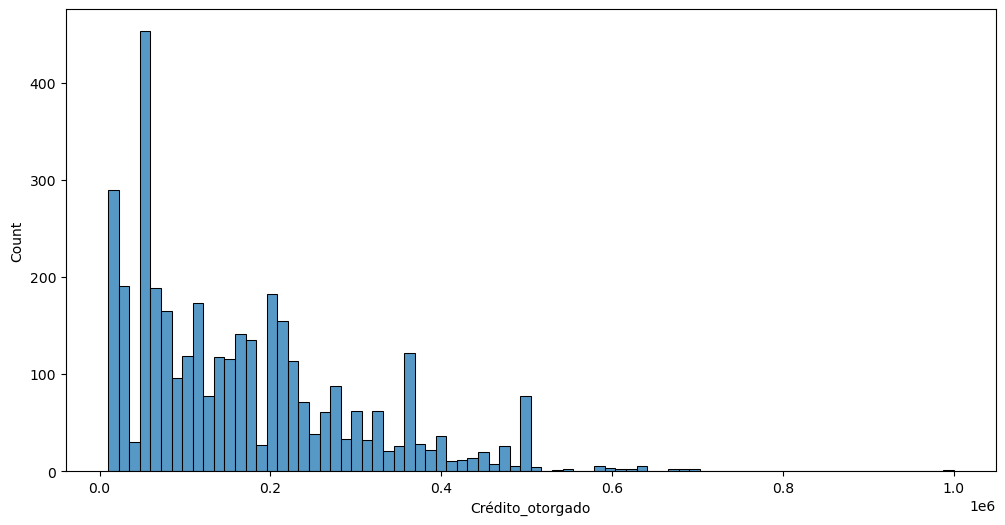

Género


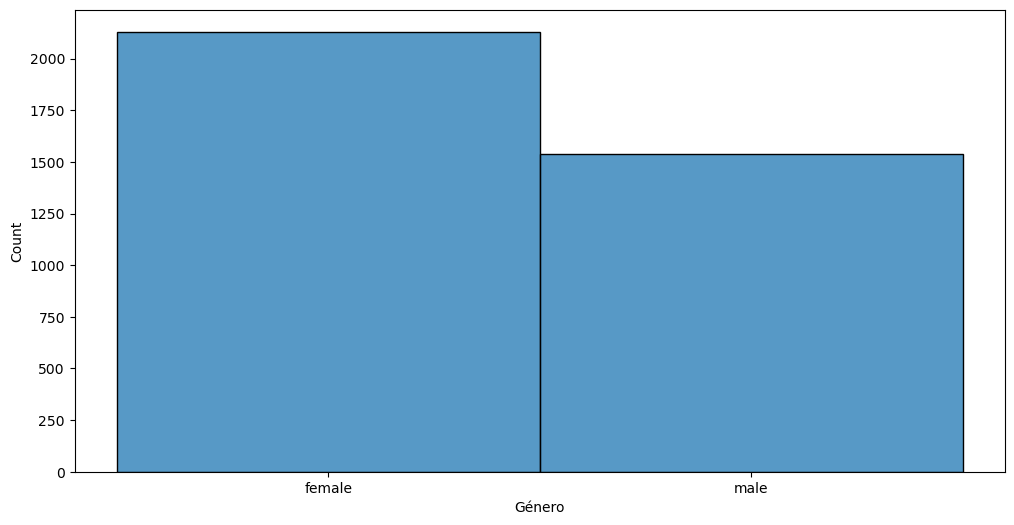

Educación


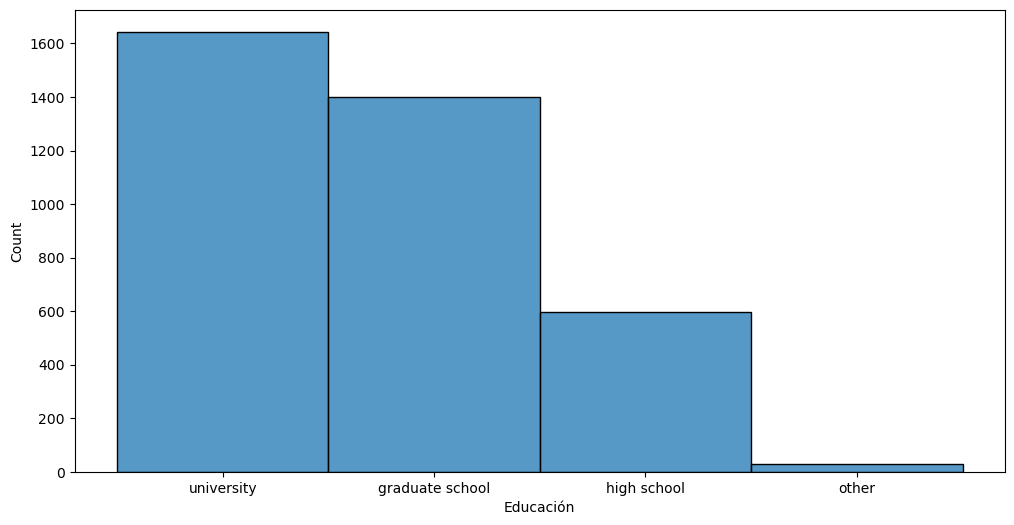

Estado_civil


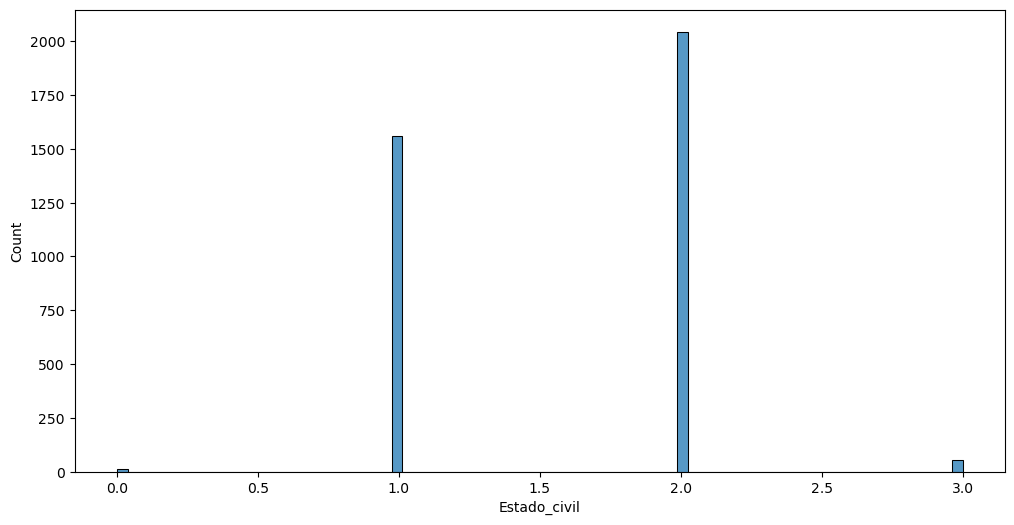

Edad


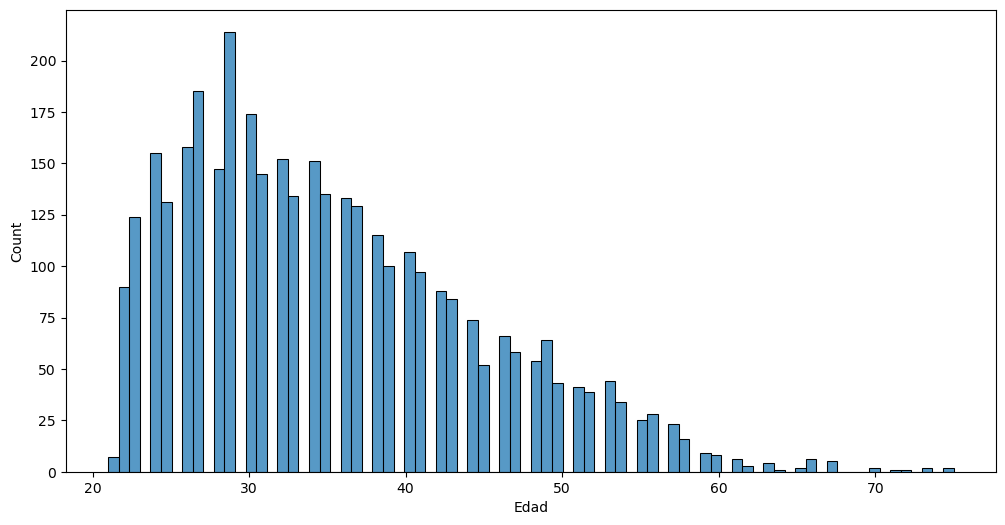

HPSEP05


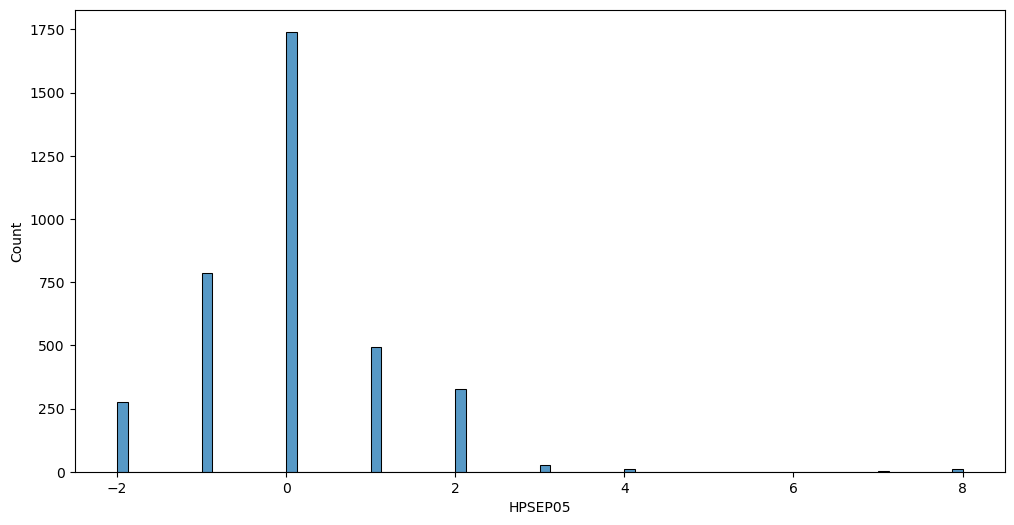

HPAG05


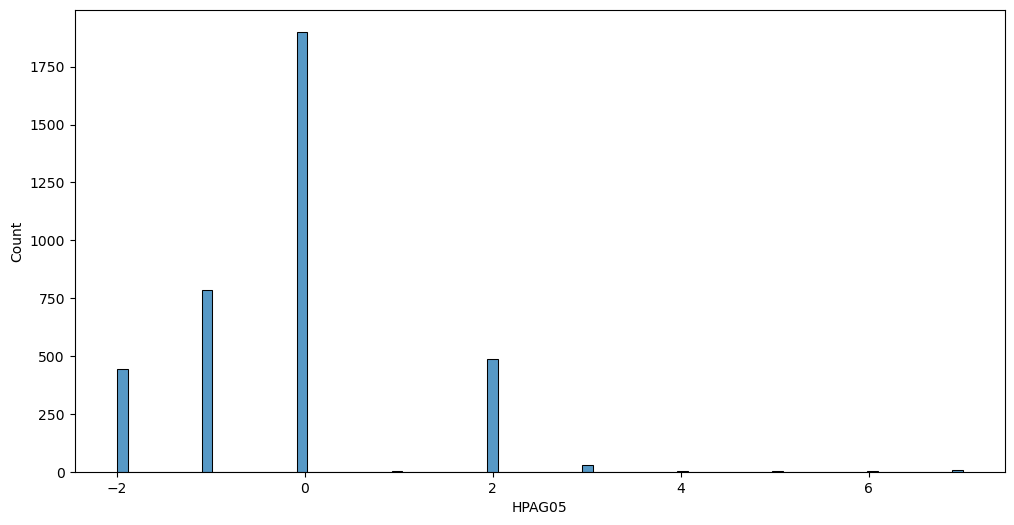

HPJL05


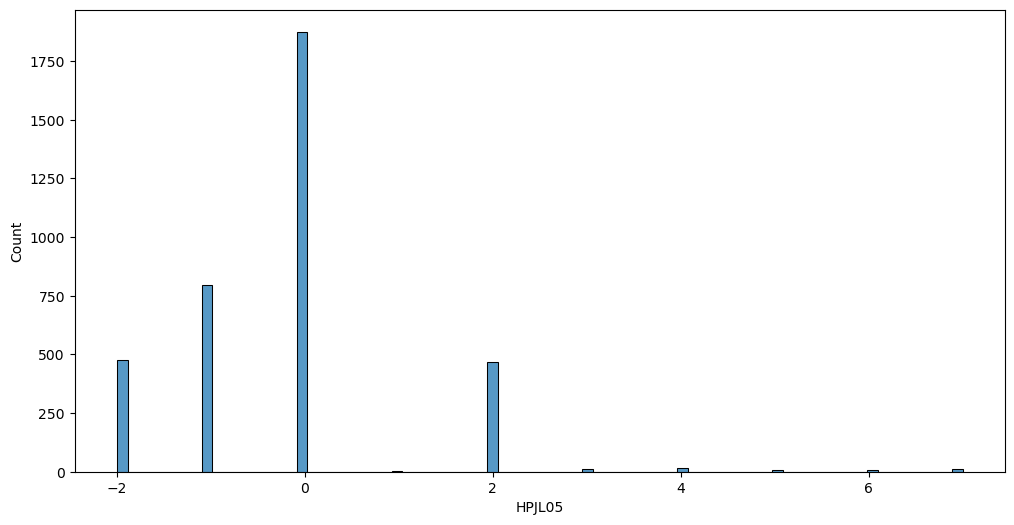

HPJN05


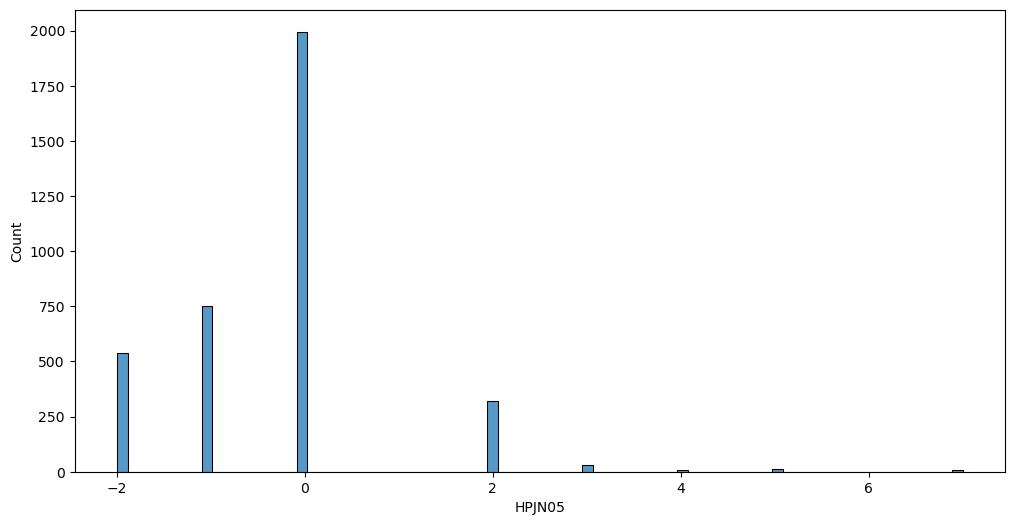

HPMY05


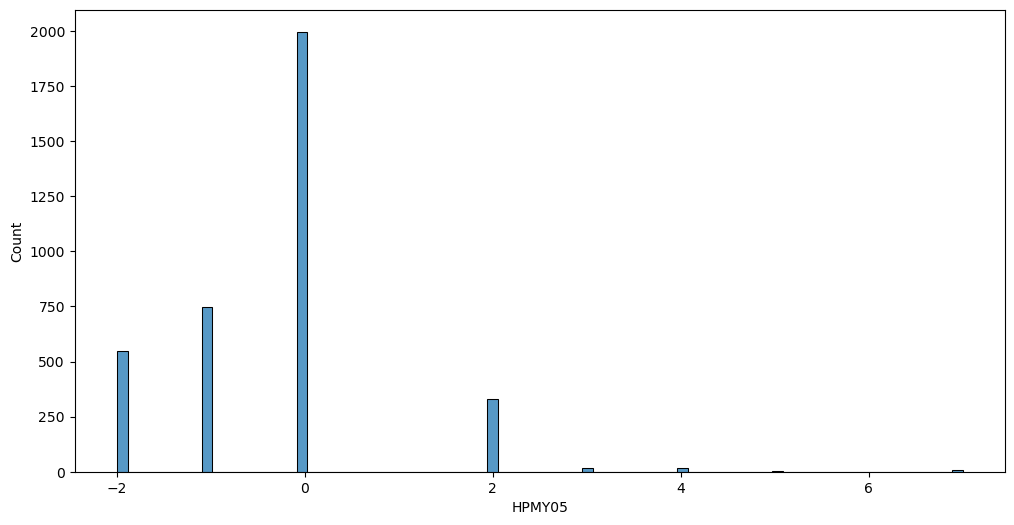

HPABR05


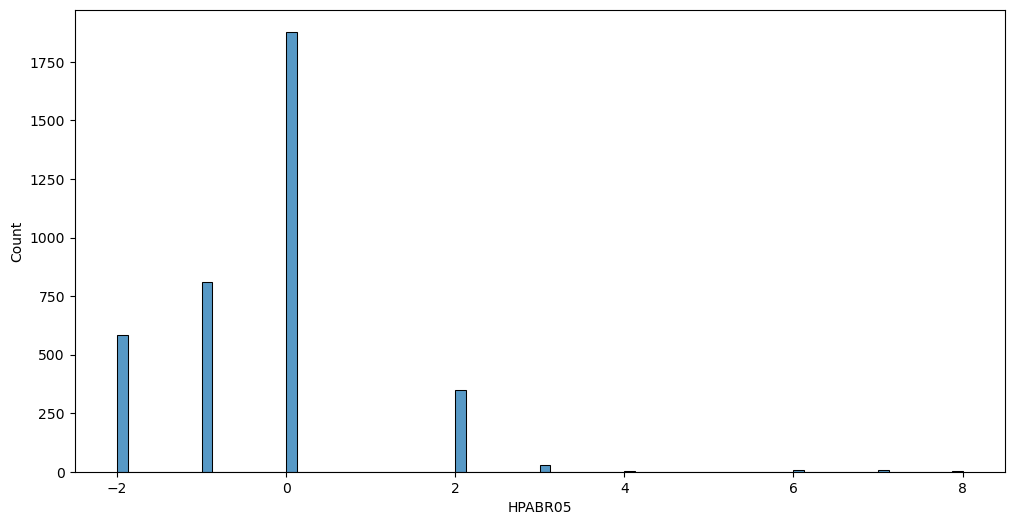

MFSEP05


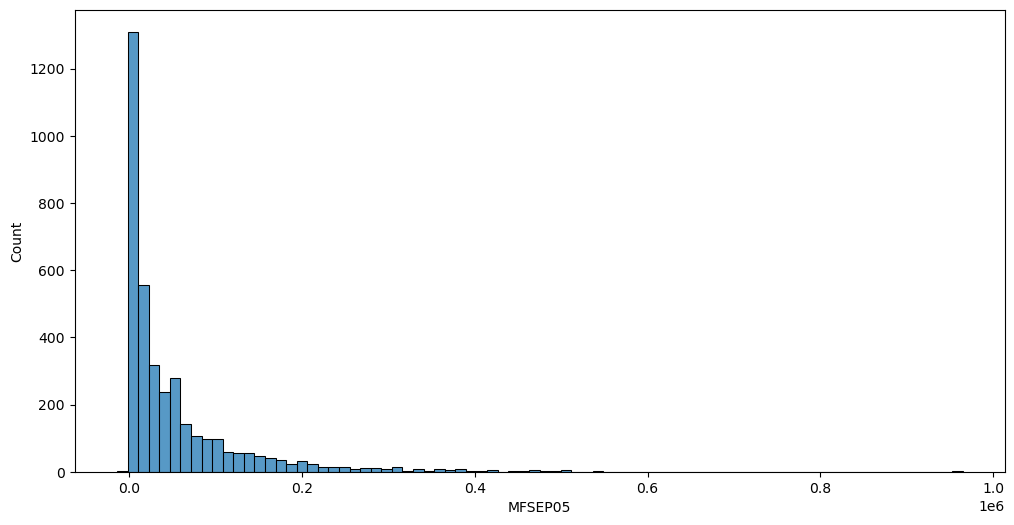

MFAG05


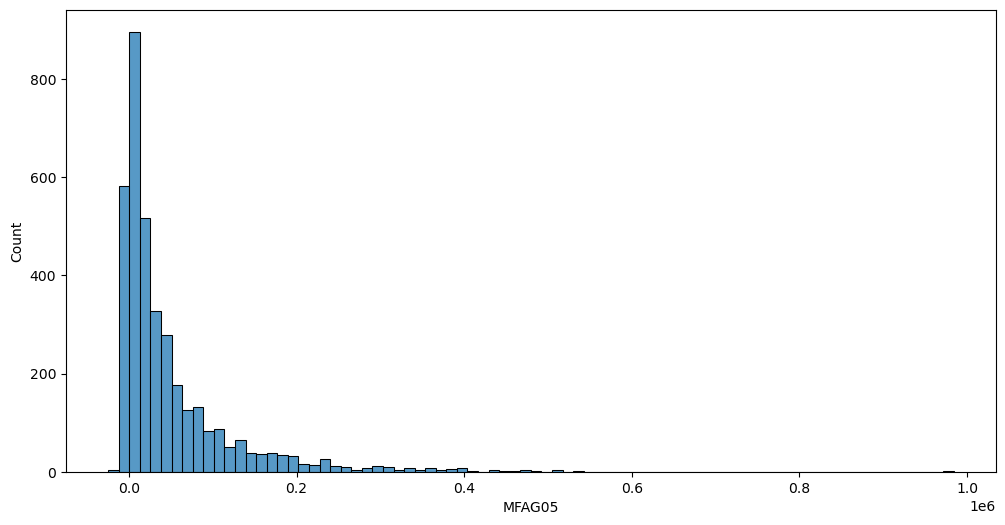

MFJL05


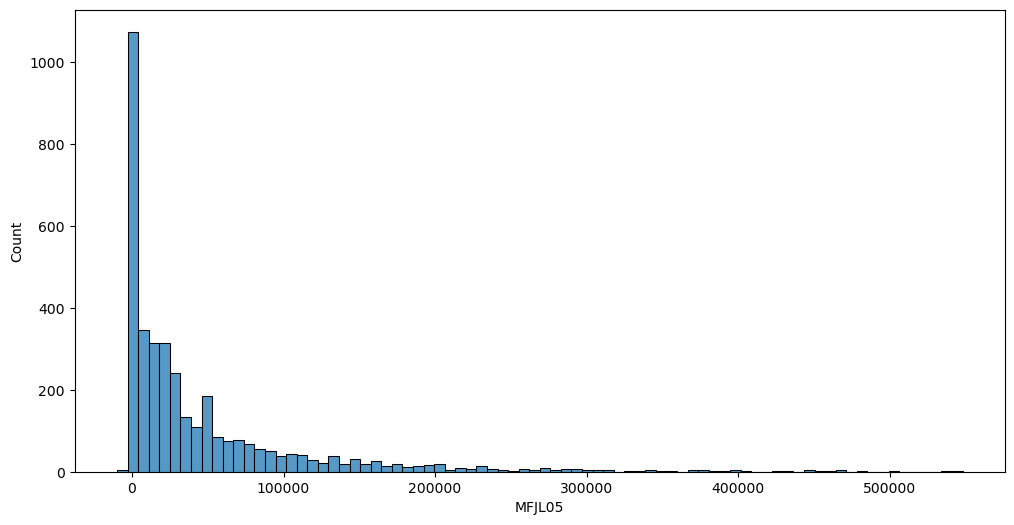

MFJN05


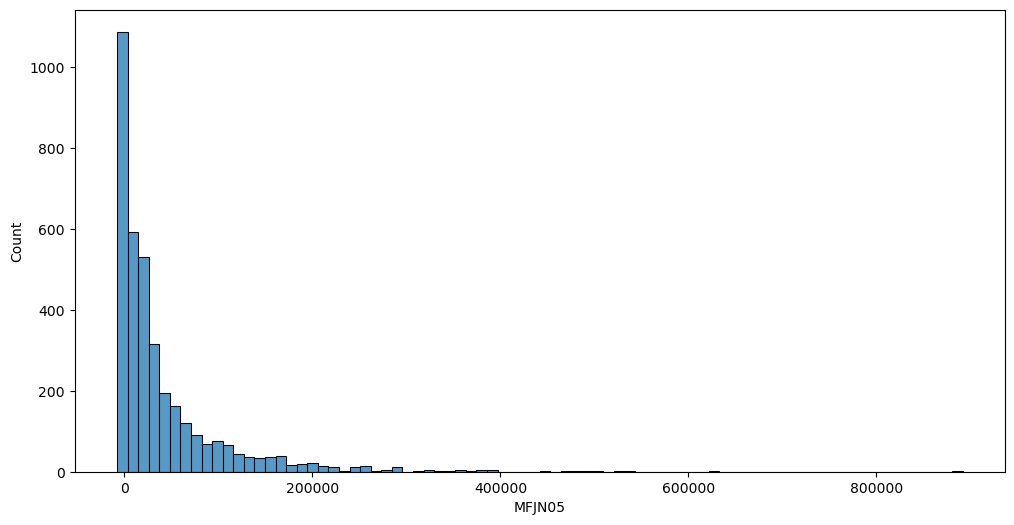

MFMY05


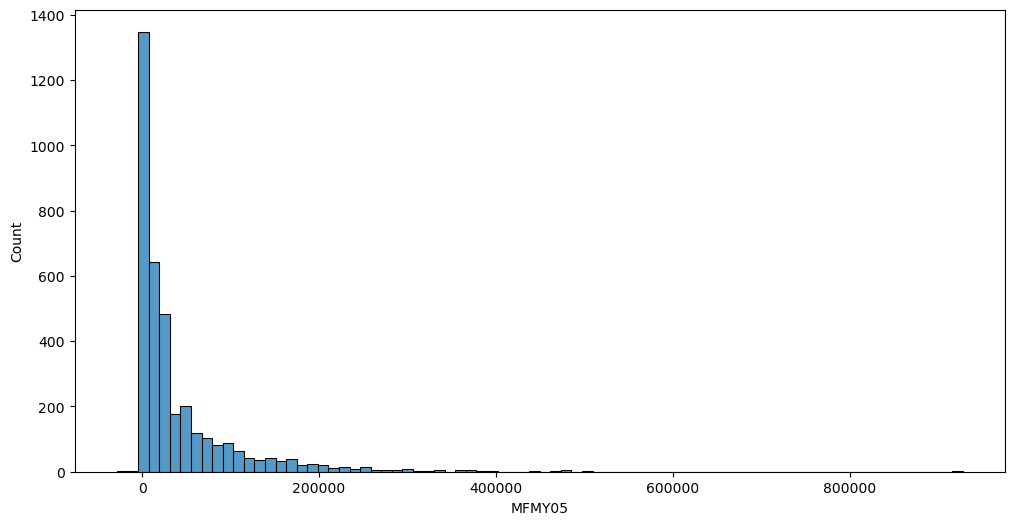

MFABR05


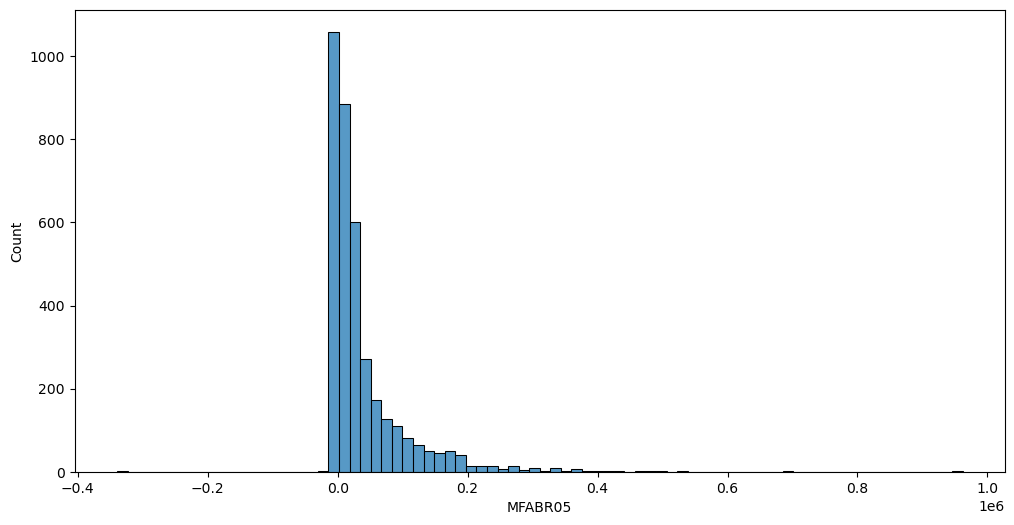

MPASEP05


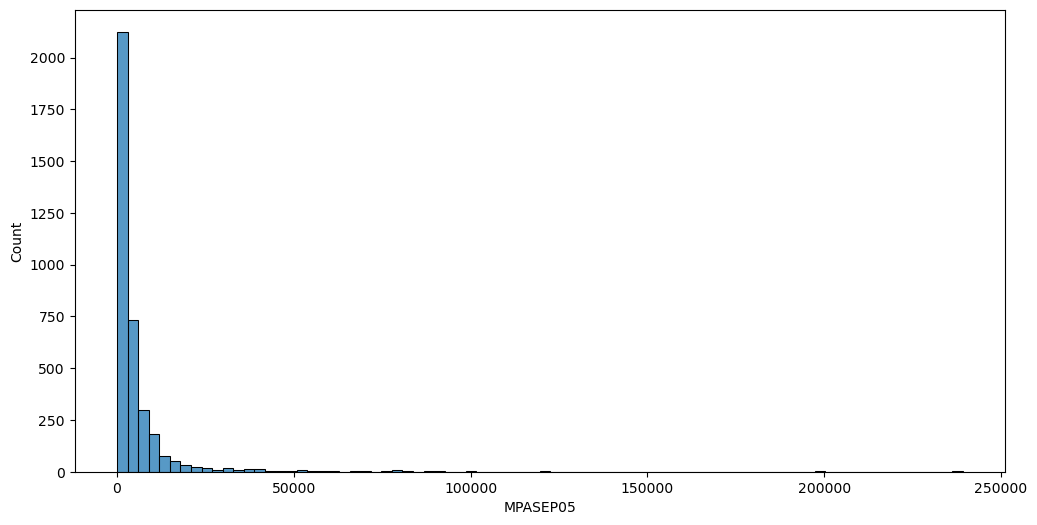

MPA_AG05


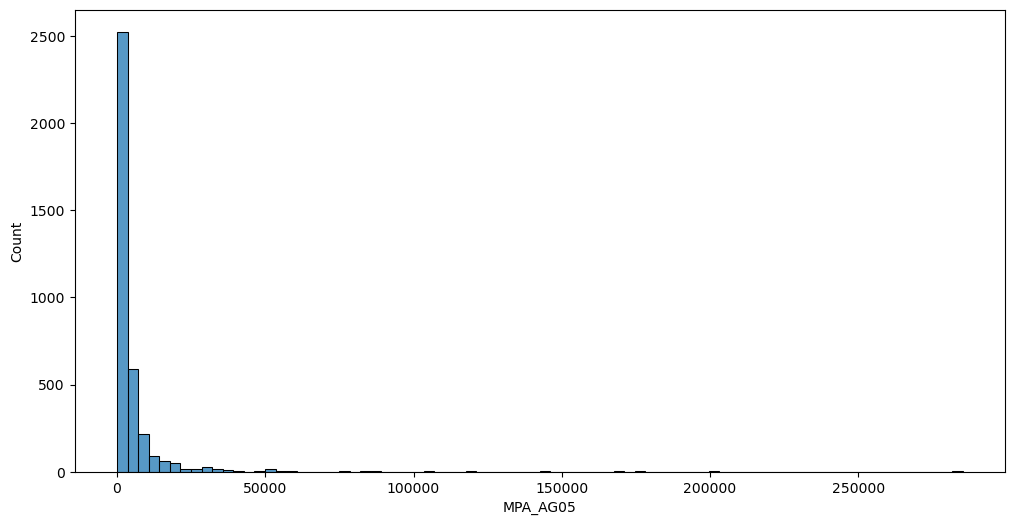

MPAJL05


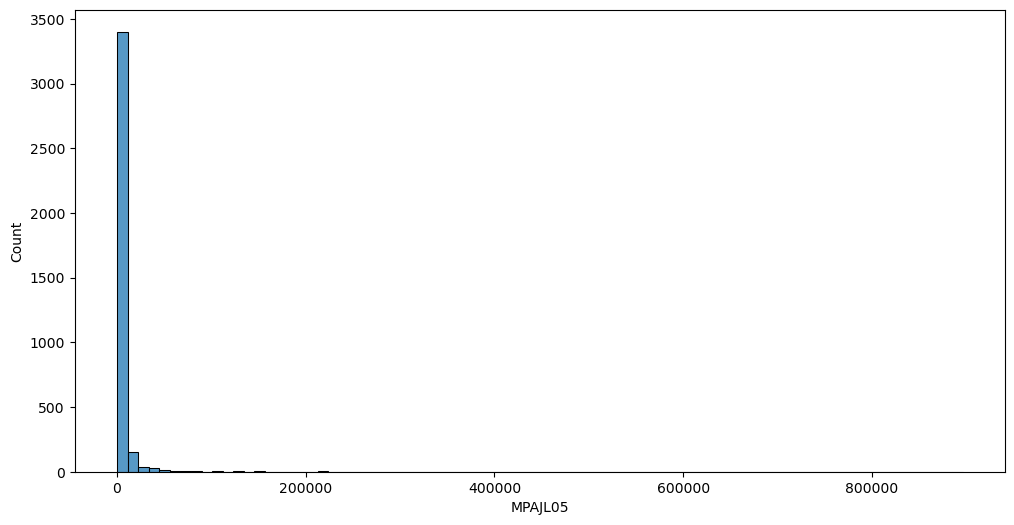

MPAJN05


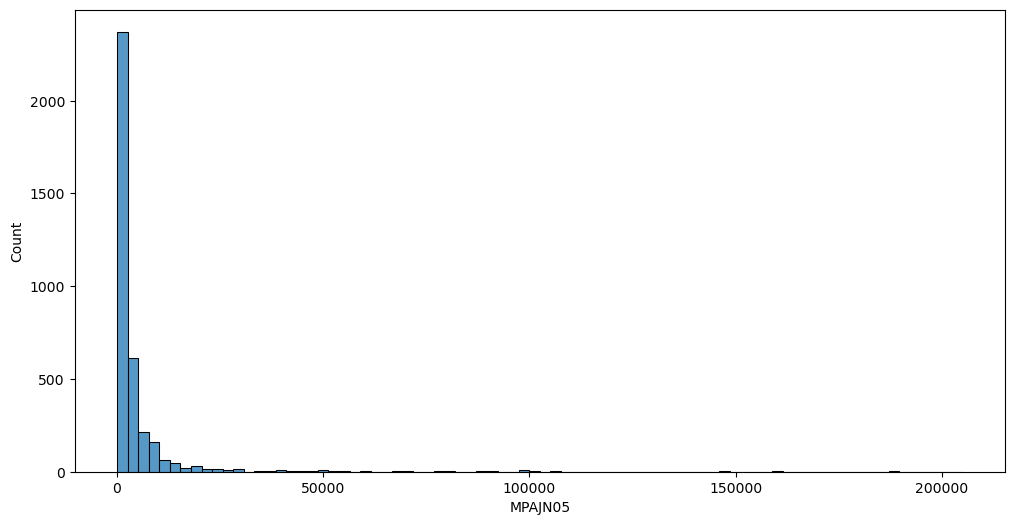

MPAMY05


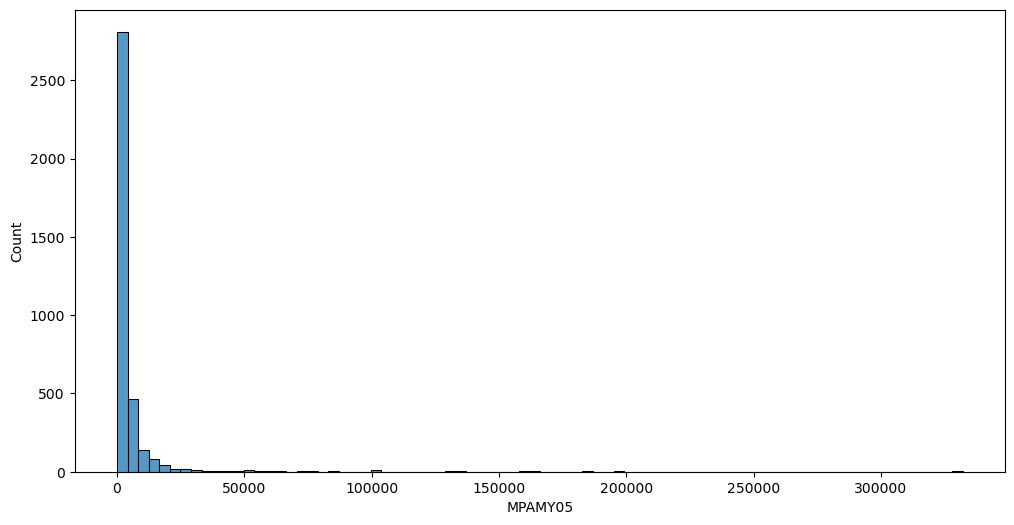

MPA_ABR05


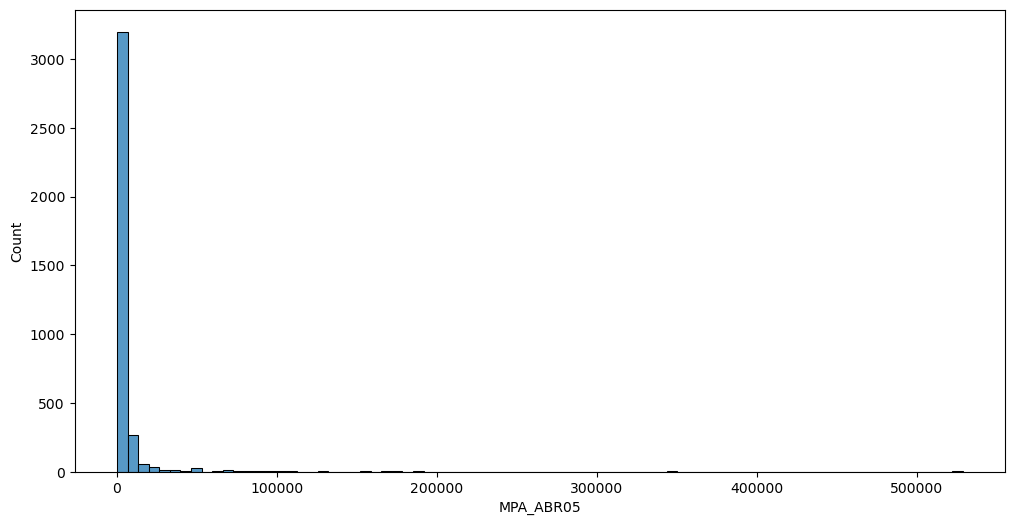

Comportamiento_cliente


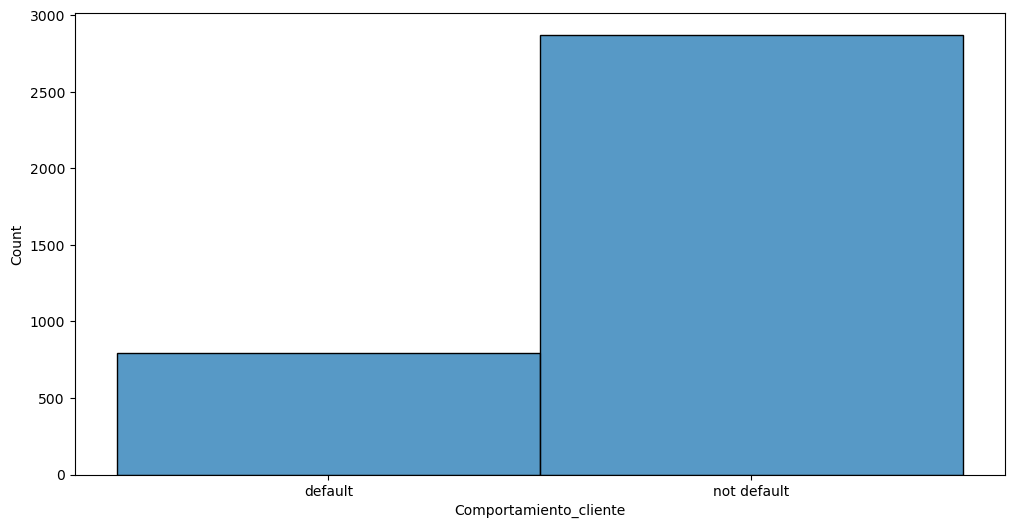

In [54]:
for i in list_to_plot:                                      
    print(i)
    fig, ax = plt.subplots(figsize=(12,6))               #descripción previa de los datos:
                                                           #1. La mayoría parecen ser créditos personales (<1M)
    sns.histplot(data = study_credit, x=i, bins = 80)      #2. Población solicitante en su myoría es femenina
    plt.show()                                             #3. Población solicitante en su myoría es de grado universitario
                                                           #4. Población solicitante en su myoría es soltera
                                                           #5. Población solicitante en su myoría ronda los 27-37 años
                                                           #6. Predominio del uso de crédito renovable (0)
                                                           #7. Predominio del Comportamiento del cliente no predeterminado (0) 
                                                           #8. Predominio de asimetría positiva
                                                           #9. presencia de outliers en el extremo superior

In [55]:
study_credit["Comportamiento_cliente"].value_counts() 

not default    2873
default         795
Name: Comportamiento_cliente, dtype: int64

In [56]:
study_credit["Género"].value_counts()

female    2130
male      1538
Name: Género, dtype: int64

In [57]:
df_Transform = df.copy(deep = True) # realizo una copia del dataframe para poder 
                                     # realizar una transformación de datos sin alterar el dataframe original

In [58]:
df_Transform

Crédito_otorgado  Género    Educación  Estado_civil  Edad  HPSEP05  \
1                20000  female   university             1    24        2   
2               120000  female   university             2    26       -1   
3                90000  female   university             2    34        0   
4                50000  female   university             1    37        0   
5                50000    male   university             1    57       -1   
...                ...     ...          ...           ...   ...      ...   
3665            220000  female   university             1    32        0   
3666             70000  female   university             2    34        1   
3667            120000    male   university             2    37       -1   
3668            180000  female   university             2    32        0   
3669             50000  female  high school             1    57        0   

      HPAG05  HPJL05  HPJN05  HPMY05  ...  MFJN05  MFMY05  MFABR05  MPASEP05  \
1          2      -1      -1      -2  ...       0       0        0         0   
2          2       0       0       0  ...    3272    3455     3261         0   
3          0       0       0       0  ...   14331   14948    15549      1518   
4          0       0       0       0  ...   28314   28959    29547      2000   
5          0      -1       0       0  ...   20940   19146    19131      2000   
...      ...     ...     ...     ...  ...     ...     ...      ...       ...   
3665       0       0       0       0  ...  208355  213015   217475      7200   
3666       2       2       2       0  ...   26456   28361    31873      1500   
3667       2       0       0       0  ...   17901   19608    19143      1000   
3668       0       0       0       0  ...   31057   29052    25933      1582   
3669       0       0       0       0  ...   48319   48449    49656      2500   

      MPA_AG05  MPAJL05  MPAJN05  MPAMY05  MPA_ABR05  Comportamiento_cliente  
1          689        0        0        0          0                 default  
2         1000     1000     1000        0       2000                 default  
3         1500     1000     1000     1000       5000             not default  
4         2019     1200     1100     1069       1000             not default  
5        36681    10000     9000      689        679             not default  
...        ...      ...      ...      ...        ...                     ...  
3665      9000    10000     8000     8010       8500             not default  
3666      2900        0     2500     4000          0             not default  
3667      1600      800     2000        0       1600                 default  
3668     30000     1000     1000     1000       1000             not default  
3669      2000     2000     1746     2000       1800             not default  

[3668 rows x 24 columns]

In [59]:
df_Transform["Comportamiento_cliente"] = np.where(df_Transform["Comportamiento_cliente"] == "default", 1,0) # transformación condicional

In [60]:
df_Transform["Género"] = np.where(df_Transform["Género"] == "male", 1,2) # transformación condicional

In [61]:
df_Transform["Comportamiento_cliente"].value_counts() #reviso transformación

0    2873
1     795
Name: Comportamiento_cliente, dtype: int64

In [62]:
df_Transform["Género"].value_counts()  #reviso transformación

2    2130
1    1538
Name: Género, dtype: int64

In [63]:
df_Transform["Educación"].value_counts()  #reviso transformación

university         1644
graduate school    1401
high school         596
other                27
Name: Educación, dtype: int64

In [64]:
datos = df_Transform["Comportamiento_cliente"] # declaro una variable para el dataframe de transformación

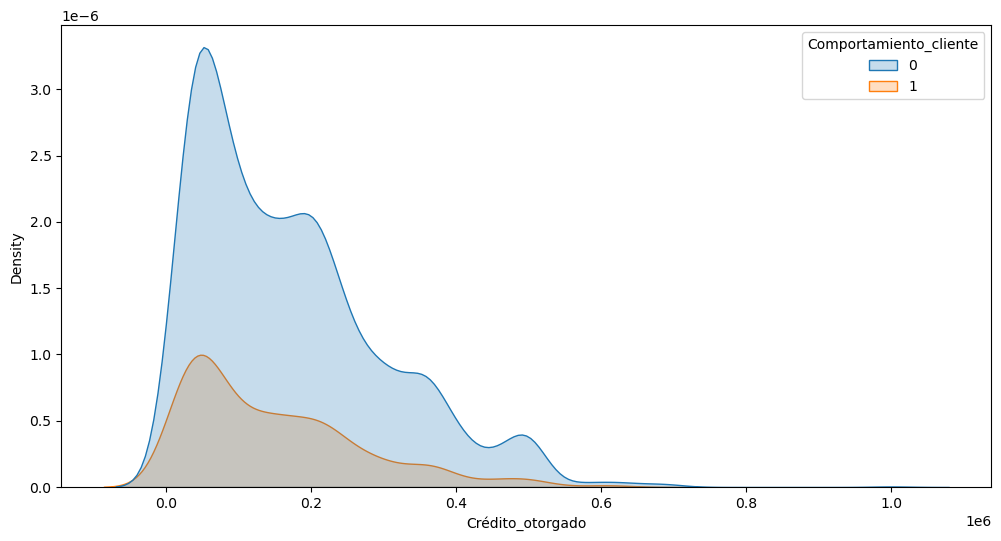

In [65]:
fig, ax = plt.subplots(figsize=(12,6))    #descripción previa de los datos:
                                          # Ninguna distribución de densidad basados en comportamiento del cliente
                                          # presenta tendencia central o dispersión significativamente diferentes
sns.kdeplot( x = df_Transform["Crédito_otorgado"], data = df_Transform, fill = True, hue = datos)  
                                                                                                 
plt.show() 

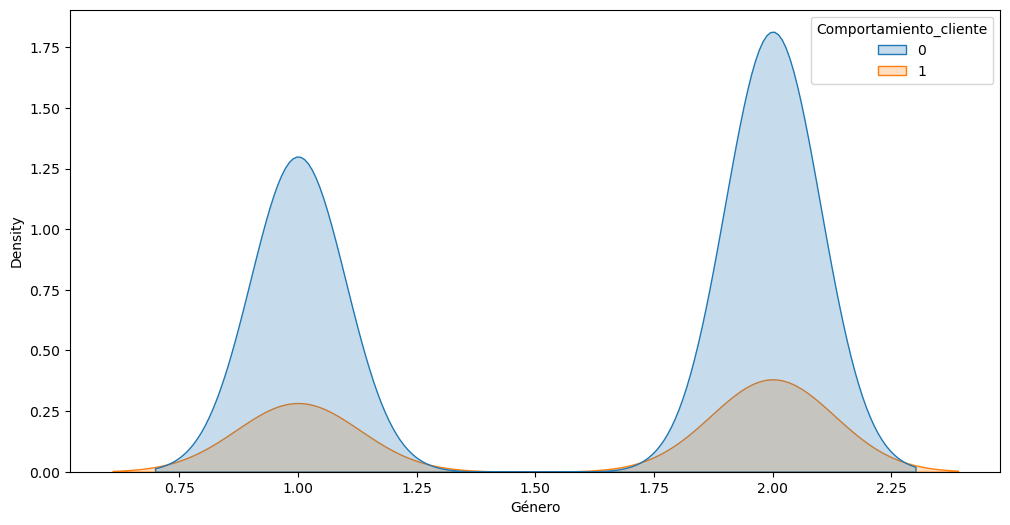

In [66]:
fig, ax = plt.subplots(figsize=(12,6))
sns.kdeplot( x = df_Transform["Género"], data = df_Transform, fill = True, hue = datos)  
plt.show() 

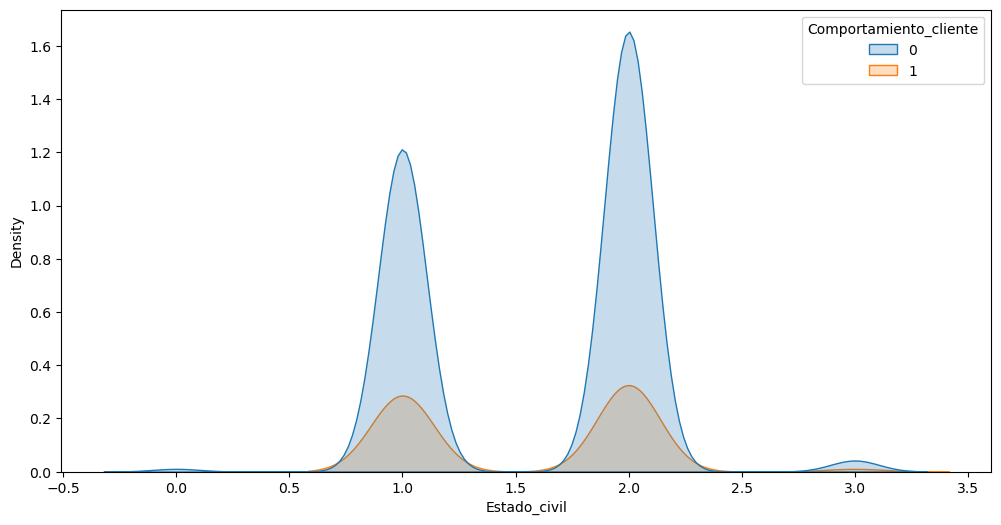

In [67]:
fig, ax = plt.subplots(figsize=(12,6))       # curtosis alta en cliente no predeterminado
sns.kdeplot( x = df_Transform["Estado_civil"], data = df_Transform, fill = True, hue = datos) 
plt.show() 

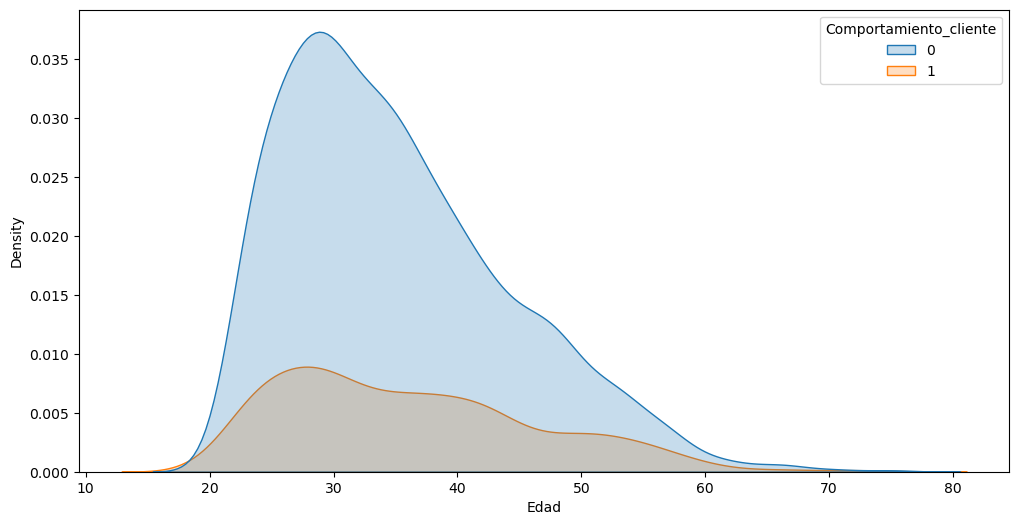

In [68]:
fig, ax = plt.subplots(figsize=(12,6))
sns.kdeplot( x = df_Transform['Edad'], data = df_Transform, fill = True, hue = datos)  
plt.show() 

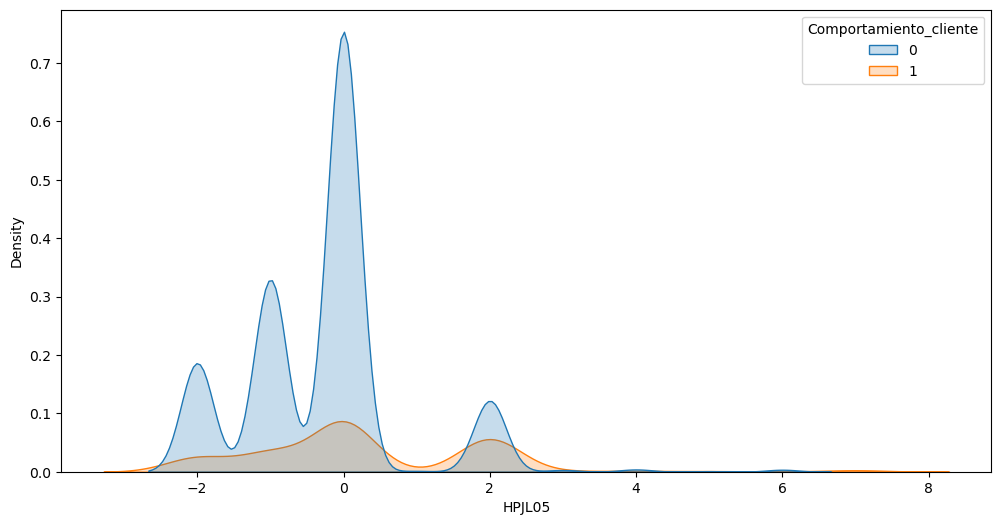

In [69]:
fig, ax = plt.subplots(figsize=(12,6))
sns.kdeplot( x = df_Transform['HPJL05'], data = df_Transform, fill = True, hue = datos)  
plt.show() 

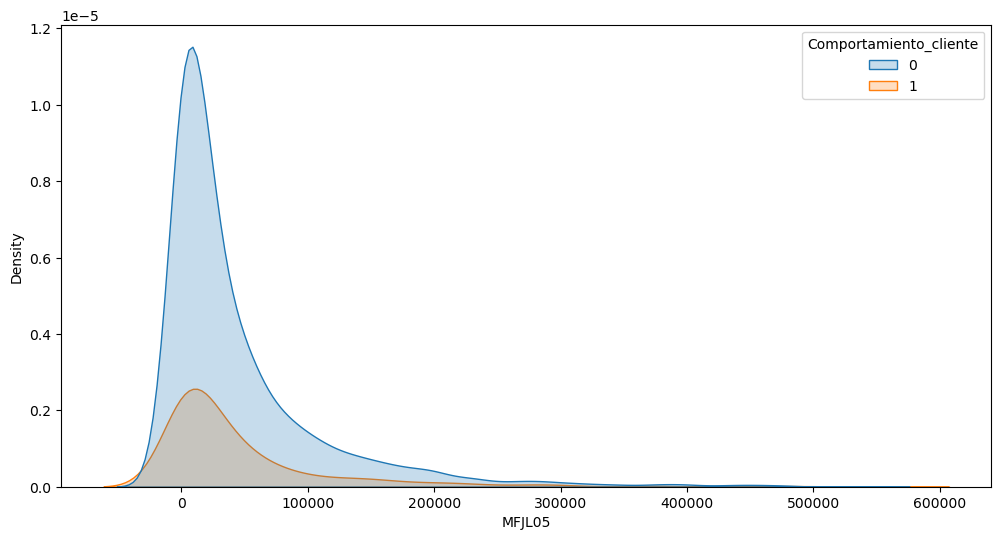

In [70]:
fig, ax = plt.subplots(figsize=(12,6))
sns.kdeplot( x = df_Transform['MFJL05'], data = df_Transform, fill = True, hue = datos)  
plt.show() 

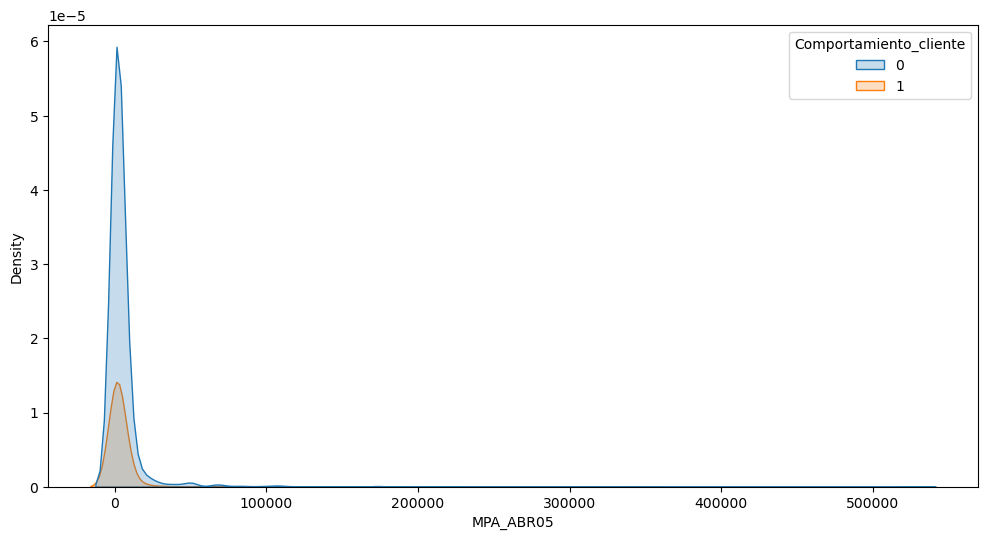

In [71]:
fig, ax = plt.subplots(figsize=(12,6))
sns.kdeplot( x = df_Transform['MPA_ABR05'], data = df_Transform, fill = True, hue = datos)  
plt.show() 

**El comportamiento del cliente parece no ser un buen predictor, sin embargo se debe comprobar con el análisis de correlación**

Text(0.5, 1.0, 'Distribución de créditos otorgados según el género del solicitante')

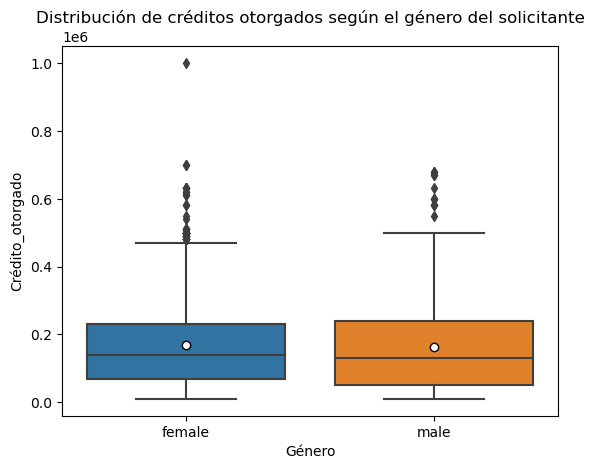

In [72]:
ax = sns.boxplot(x = "Género", y = "Crédito_otorgado", data = study_credit, showmeans = True, meanprops = {"marker":
                                                                                        "o", "markerfacecolor":"white", "markersize":
                                                                                        "6", "markeredgecolor": "black"})
ax.set_title("Distribución de créditos otorgados según el género del solicitante") # no hay diferencias significativas 
                                                                                   # entre los montos de los créditos y los 
                                                                                   #  géneros de solicitantes


Text(0.5, 1.0, 'Distribución de créditos otorgados según el grado de estudios del solicitante')

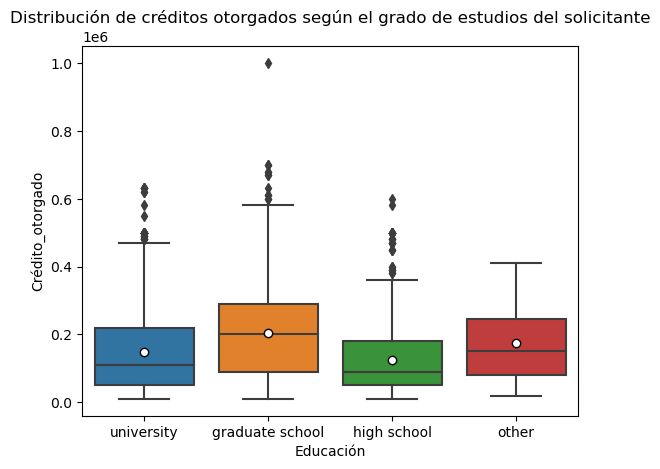

In [73]:
ax = sns.boxplot(x = "Educación", y = "Crédito_otorgado", data = study_credit,showmeans = True, meanprops = {"marker":
                                                                                        "o", "markerfacecolor":"white", "markersize":
                                                                                        "6", "markeredgecolor": "black"})          
ax.set_title("Distribución de créditos otorgados según el grado de estudios del solicitante")  
                                                                                     # no hay diferencias significativas 
                                                                                    # entre los montos de los créditos y el
                                                                                   # nivel educativativo del solicitante
                                                                                 # sin embargo las personas con postgrados
                                                                                # tiene acceso a mayores montos

Text(0.5, 1.0, 'Distribución de créditos otorgados según el Estado civil del solicitante')

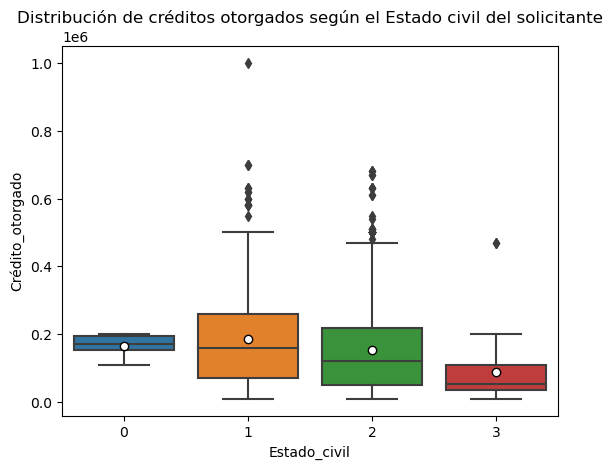

In [74]:
ax = sns.boxplot(x = "Estado_civil", y = "Crédito_otorgado", data = study_credit,showmeans = True, meanprops = {"marker":
                                                                                        "o", "markerfacecolor":"white", "markersize":
                                                                                        "6", "markeredgecolor": "black"})
ax.set_title("Distribución de créditos otorgados según el Estado civil del solicitante")  
                                                                                       # no hay diferencias significativas 
                                                                                    # entre los montos de los créditos y el
                                                                                   # estado civil del solicitante
                                                                                 # sin embargo las personas casadas
                                                                                # tiene acceso a mayores montos y las personas
                                                                              #en otra condición (divorciado) tiene acceso
                                                                             # a menores montos 

Text(0.5, 1.0, 'Distribución de Edades de los solicitantes de créditos acuerdo a su Educación')

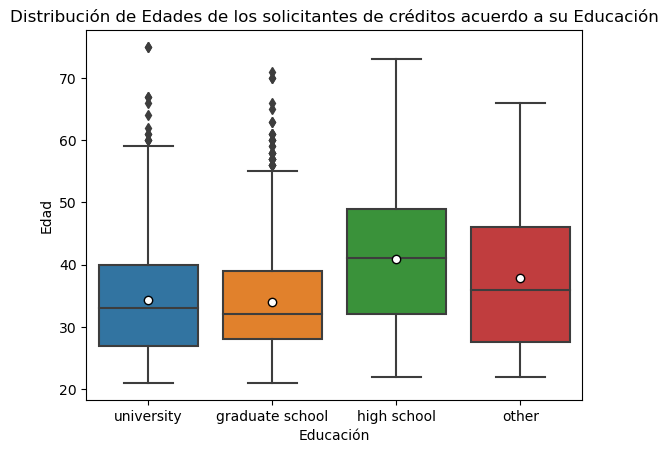

In [75]:
ax = sns.boxplot(x = "Educación", y = "Edad", data = study_credit,showmeans = True, meanprops = {"marker":
                                                                                        "o", "markerfacecolor":"white", "markersize":
                                                                                        "6", "markeredgecolor": "black"})
ax.set_title("Distribución de Edades de los solicitantes de créditos acuerdo a su Educación")
                                                                                         # no hay diferencias significativas 
                                                                                    # entre las edades de los solicitantes de créditos
                                                                                # y el grado de educación,sin embargo podemos observar
                                                                                # que la población de las personas solicitantes de créditos
                                                                              # con grado universitario contemplan la mayor diversidad
                                                                             # en edades. 

**Analizo las variables financieras**

In [76]:
sns.set()

In [77]:
cols = ['Crédito_otorgado','HPSEP05', 'HPAG05', 'HPJL05', 'HPJN05', 'HPMY05', 'HPABR05', 'MFSEP05',
       'MFAG05', 'MFJL05', 'MFJN05', 'MFMY05', 'MFABR05', 'MPASEP05',
       'MPA_AG05', 'MPAJL05', 'MPAJN05', 'MPAMY05', 'MPA_ABR05']         
                                                                                   

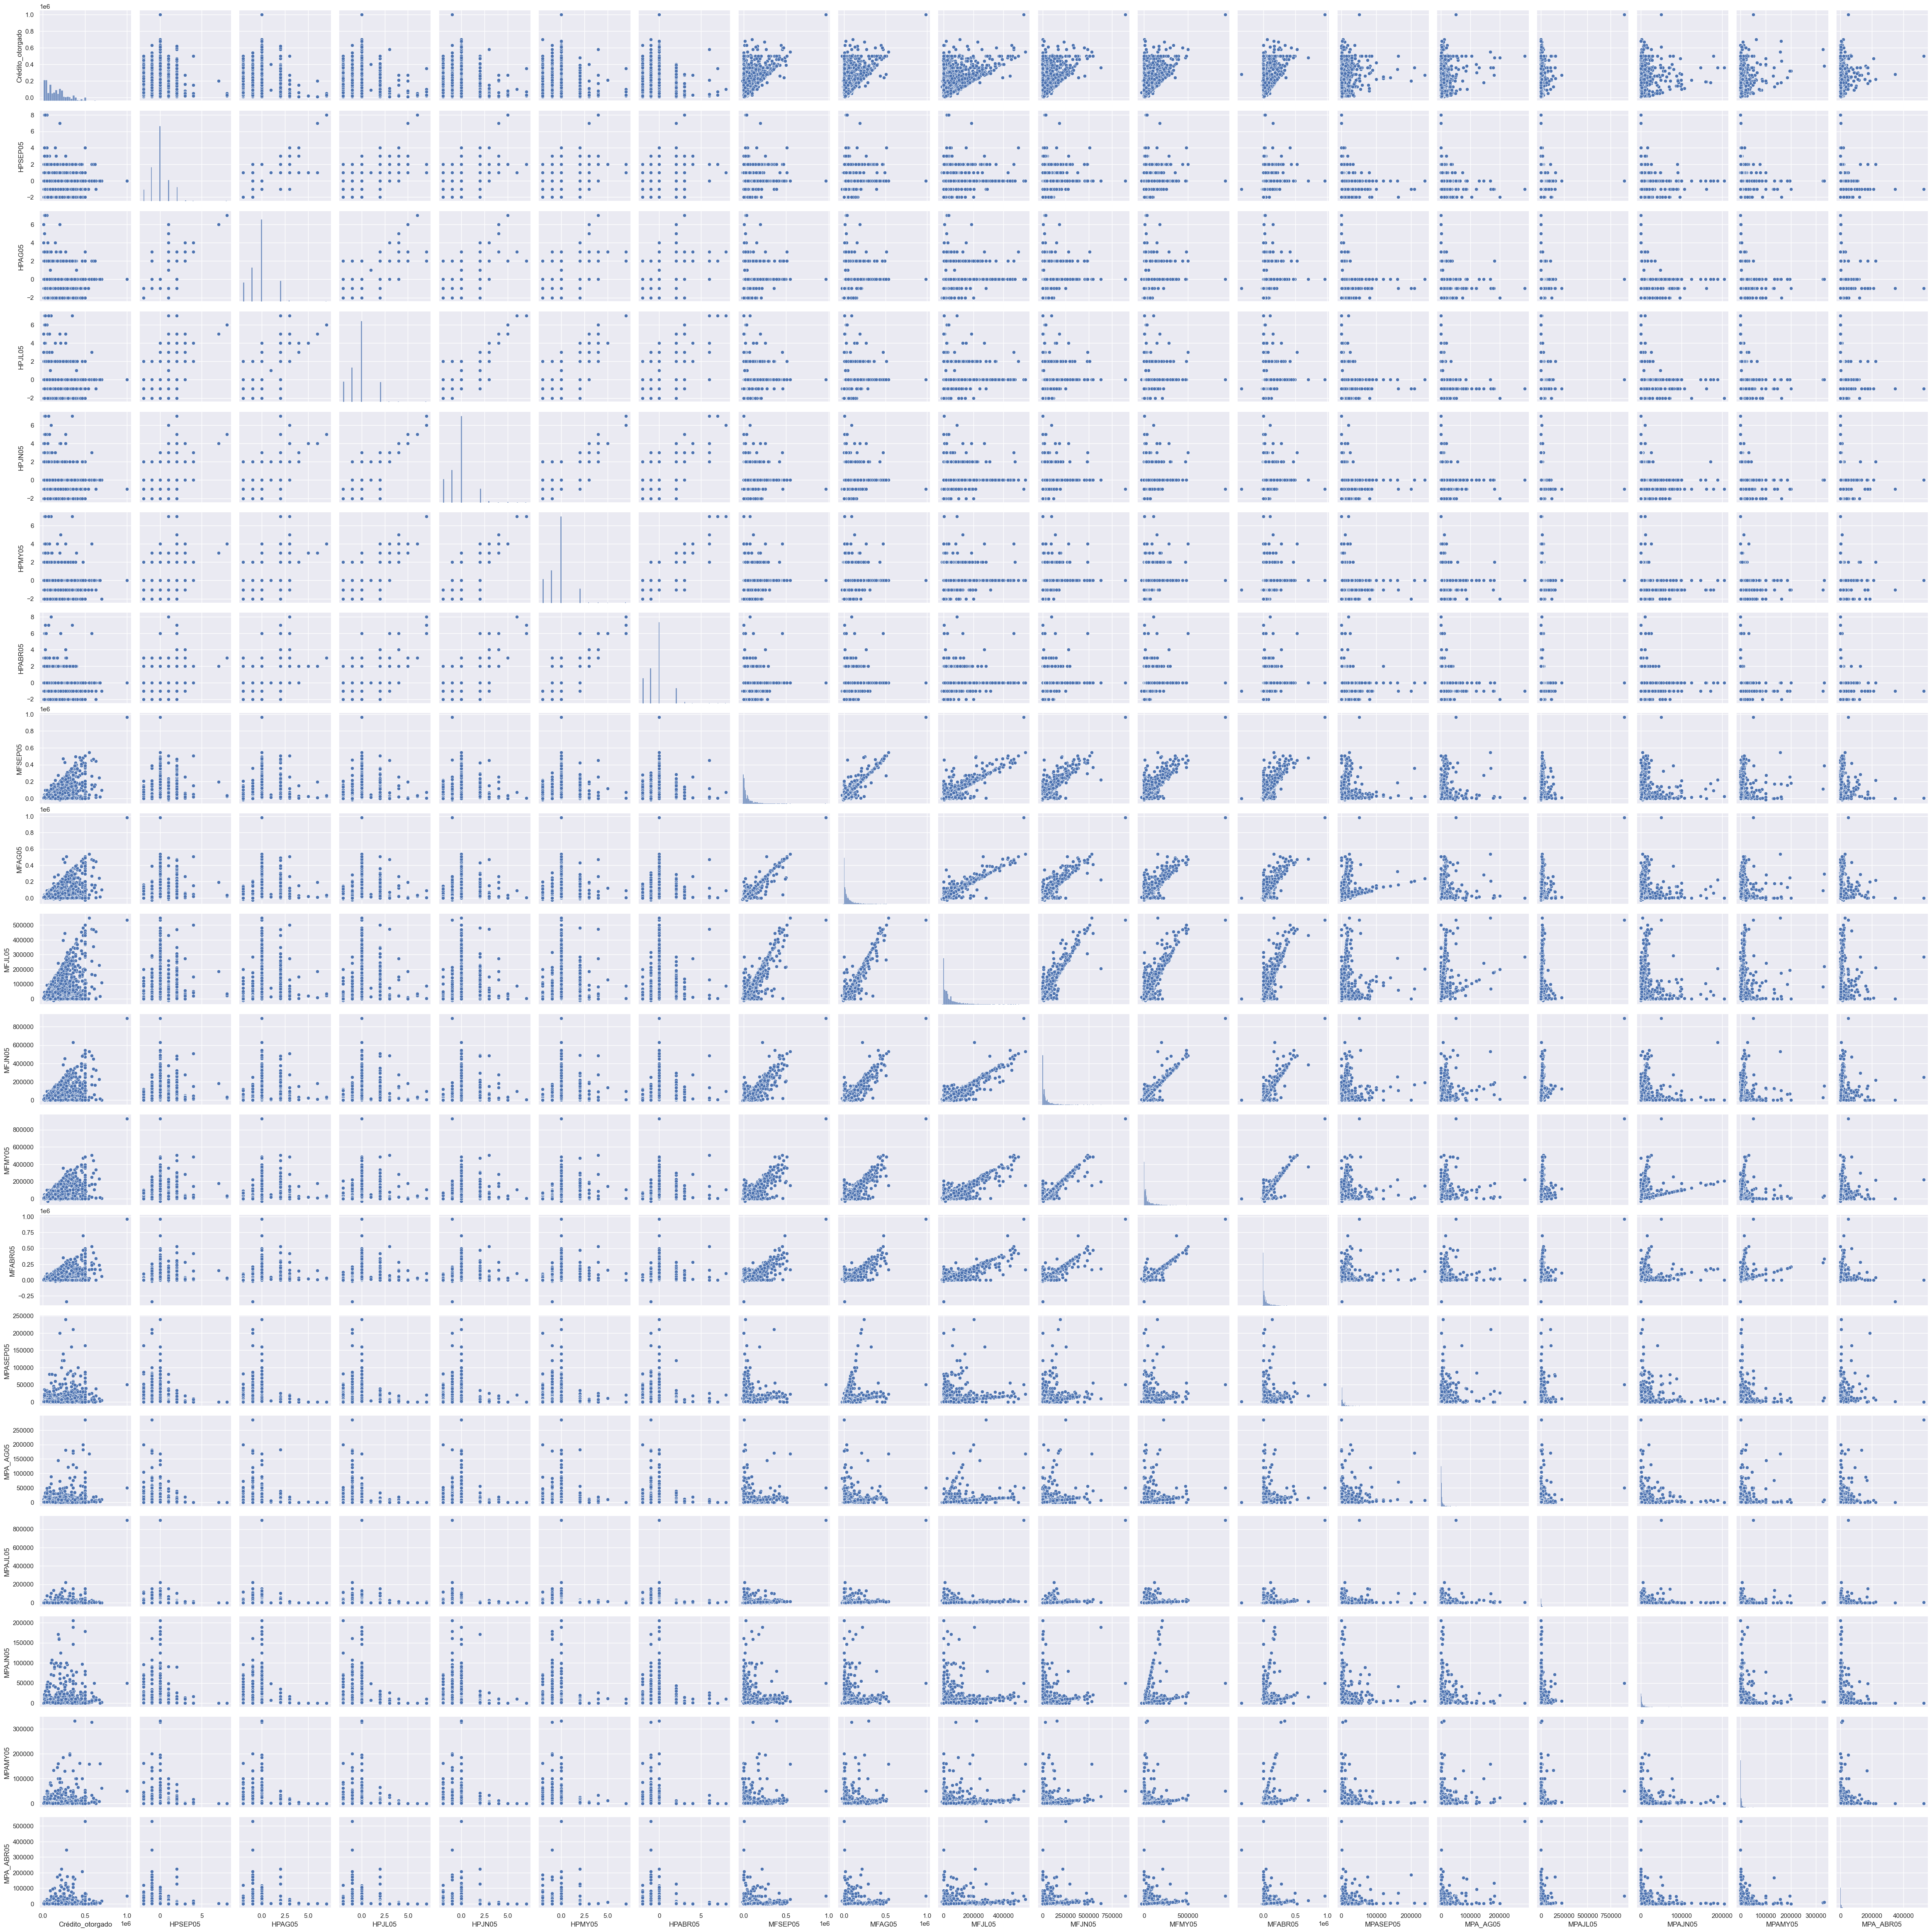

In [78]:
sns.pairplot(study_credit[cols], height = 2.5)  #Analizo la relación de los historiales
                                                #de pago, montos pagados y facturas con el crédito

In [79]:
study_credit

Crédito_otorgado  Género    Educación  Estado_civil  Edad  HPSEP05  \
1                20000  female   university             1    24        2   
2               120000  female   university             2    26       -1   
3                90000  female   university             2    34        0   
4                50000  female   university             1    37        0   
5                50000    male   university             1    57       -1   
...                ...     ...          ...           ...   ...      ...   
3665            220000  female   university             1    32        0   
3666             70000  female   university             2    34        1   
3667            120000    male   university             2    37       -1   
3668            180000  female   university             2    32        0   
3669             50000  female  high school             1    57        0   

      HPAG05  HPJL05  HPJN05  HPMY05  ...  MFJN05  MFMY05  MFABR05  MPASEP05  \
1          2      -1      -1      -2  ...       0       0        0         0   
2          2       0       0       0  ...    3272    3455     3261         0   
3          0       0       0       0  ...   14331   14948    15549      1518   
4          0       0       0       0  ...   28314   28959    29547      2000   
5          0      -1       0       0  ...   20940   19146    19131      2000   
...      ...     ...     ...     ...  ...     ...     ...      ...       ...   
3665       0       0       0       0  ...  208355  213015   217475      7200   
3666       2       2       2       0  ...   26456   28361    31873      1500   
3667       2       0       0       0  ...   17901   19608    19143      1000   
3668       0       0       0       0  ...   31057   29052    25933      1582   
3669       0       0       0       0  ...   48319   48449    49656      2500   

      MPA_AG05  MPAJL05  MPAJN05  MPAMY05  MPA_ABR05  Comportamiento_cliente  
1          689        0        0        0          0                 default  
2         1000     1000     1000        0       2000                 default  
3         1500     1000     1000     1000       5000             not default  
4         2019     1200     1100     1069       1000             not default  
5        36681    10000     9000      689        679             not default  
...        ...      ...      ...      ...        ...                     ...  
3665      9000    10000     8000     8010       8500             not default  
3666      2900        0     2500     4000          0             not default  
3667      1600      800     2000        0       1600                 default  
3668     30000     1000     1000     1000       1000             not default  
3669      2000     2000     1746     2000       1800             not default  

[3668 rows x 24 columns]

In [80]:
study_credit = pd.get_dummies(study_credit)  #genero variables discretas ficticias (0,1) para las variables categóricas de tipo nominal
study_credit.head(5)

Crédito_otorgado  Estado_civil  Edad  HPSEP05  HPAG05  HPJL05  HPJN05  \
1             20000             1    24        2       2      -1      -1   
2            120000             2    26       -1       2       0       0   
3             90000             2    34        0       0       0       0   
4             50000             1    37        0       0       0       0   
5             50000             1    57       -1       0      -1       0   

   HPMY05  HPABR05  MFSEP05  ...  MPAMY05  MPA_ABR05  Género_female  \
1      -2       -2     3913  ...        0          0              1   
2       0        2     2682  ...        0       2000              1   
3       0        0    29239  ...     1000       5000              1   
4       0        0    46990  ...     1069       1000              1   
5       0        0     8617  ...      689        679              0   

   Género_male  Educación_graduate school  Educación_high school  \
1            0                          0                      0   
2            0                          0                      0   
3            0                          0                      0   
4            0                          0                      0   
5            1                          0                      0   

   Educación_other  Educación_university  Comportamiento_cliente_default  \
1                0                     1                               1   
2                0                     1                               1   
3                0                     1                               0   
4                0                     1                               0   
5                0                     1                               0   

   Comportamiento_cliente_not default  
1                                   0  
2                                   0  
3                                   1  
4                                   1  
5                                   1  

[5 rows x 29 columns]

In [81]:
cormat= study_credit.corr(method = "pearson")   # Analizo la correlación de variables que fueron 
                                                #comprobadas con gráficas de dispersión
cormat                                          # utilizo la correlación de Pearson ya que tengo variables cuantitativas.
                                               # se observa correlación entre variables financieras (HP) con otras variables

Crédito_otorgado  Estado_civil      Edad  \
Crédito_otorgado                            1.000000     -0.142109  0.158647   
Estado_civil                               -0.142109      1.000000 -0.421556   
Edad                                        0.158647     -0.421556  1.000000   
HPSEP05                                    -0.193627      0.032158 -0.023473   
HPAG05                                     -0.245830      0.043335 -0.038318   
HPJL05                                     -0.236423      0.047459 -0.044492   
HPJN05                                     -0.227622      0.051615 -0.025743   
HPMY05                                     -0.221567      0.046246 -0.012093   
HPABR05                                    -0.220685      0.045129 -0.011538   
MFSEP05                                     0.347138     -0.041317  0.063672   
MFAG05                                      0.350444     -0.036592  0.058651   
MFJL05                                      0.356201     -0.046478  0.066153   
MFJN05                                      0.359819     -0.035075  0.056487   
MFMY05                                      0.352102     -0.039266  0.050988   
MFABR05                                     0.342870     -0.045079  0.060897   
MPASEP05                                    0.259924     -0.035955  0.032821   
MPA_AG05                                    0.261706     -0.061486  0.084224   
MPAJL05                                     0.218779     -0.024319  0.041666   
MPAJN05                                     0.201622     -0.008391 -0.002775   
MPAMY05                                     0.223146     -0.031263  0.031152   
MPA_ABR05                                   0.203018     -0.014585  0.048908   
Género_female                               0.022378     -0.038194 -0.110087   
Género_male                                -0.022378      0.038194  0.110087   
Educación_graduate school                   0.228166      0.145294 -0.106740   
Educación_high school                      -0.139112     -0.113868  0.257490   
Educación_other                             0.005180      0.001364  0.023130   
Educación_university                       -0.120615     -0.057720 -0.090694   
Comportamiento_cliente_default             -0.072486     -0.028212  0.046870   
Comportamiento_cliente_not default          0.072486      0.028212 -0.046870   

                                     HPSEP05    HPAG05    HPJL05    HPJN05  \
Crédito_otorgado                   -0.193627 -0.245830 -0.236423 -0.227622   
Estado_civil                        0.032158  0.043335  0.047459  0.051615   
Edad                               -0.023473 -0.038318 -0.044492 -0.025743   
HPSEP05                             1.000000  0.637960  0.547881  0.495357   
HPAG05                              0.637960  1.000000  0.758939  0.666219   
HPJL05                              0.547881  0.758939  1.000000  0.812819   
HPJN05                              0.495357  0.666219  0.812819  1.000000   
HPMY05                              0.469966  0.637249  0.726717  0.840000   
HPABR05                             0.440816  0.599671  0.669040  0.744149   
MFSEP05                             0.175302  0.229667  0.194960  0.204609   
MFAG05                              0.177932  0.232233  0.218501  0.222795   
MFJL05                              0.176792  0.233727  0.221273  0.255089   
MFJN05                              0.179044  0.232342  0.221080  0.254416   
MFMY05                              0.186501  0.236535  0.224466  0.259570   
MFABR05                             0.184713  0.229171  0.220331  0.251332   
MPASEP05                           -0.098014 -0.067626 -0.004762 -0.020180   
MPA_AG05                           -0.113127 -0.071107 -0.088771  0.010867   
MPAJL05                            -0.031521 -0.016008 -0.018713 -0.046460   
MPAJN05                            -0.060956 -0.043575 -0.045260 -0.027270   
MPAMY05                            -0.038942 -0.035705 -0.031099 -0.021649 

In [82]:
study_credit.dtypes # revisamos el tipo de datos de cada columna 

Crédito_otorgado                      int32
Estado_civil                          int32
Edad                                  int32
HPSEP05                               int32
HPAG05                                int32
HPJL05                                int32
HPJN05                                int32
HPMY05                                int32
HPABR05                               int32
MFSEP05                               int32
MFAG05                                int32
MFJL05                                int32
MFJN05                                int32
MFMY05                                int32
MFABR05                               int32
MPASEP05                              int32
MPA_AG05                              int32
MPAJL05                               int32
MPAJN05                               int32
MPAMY05                               int32
MPA_ABR05                             int32
Género_female                         uint8
Género_male                     

In [83]:
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Seleccionar solo las variables numéricas en las que se calculará el VIF
numeric_vars = study_credit.select_dtypes(include=['int32', 'int8'])

# Crear DataFrame para almacenar los resultados del VIF
vif = pd.DataFrame()                                       #calculamos el Factor de Inflación de Varianza del archivo para
                                                        # evaluar la multicolinealidad de variables (>= 5 indica problemas)
vif["Variable"] = numeric_vars.columns
vif["VIF"] = [variance_inflation_factor(numeric_vars.values, i) for i in range(numeric_vars.shape[1])]

# Imprimir los resultados
print(vif)

            Variable       VIF
0   Crédito_otorgado  0.000003
1       Estado_civil  4.615863
2               Edad  5.843293
3            HPSEP05  1.755747
4             HPAG05  3.032338
5             HPJL05  4.161222
6             HPJN05  5.248773
7             HPMY05  5.189537
8            HPABR05  3.499447
9            MFSEP05  0.000577
10            MFAG05  0.000512
11            MFJL05 -0.003575
12            MFJN05  0.001735
13            MFMY05  0.003601
14           MFABR05  0.000638
15          MPASEP05 -0.003652
16          MPA_AG05  0.000333
17           MPAJL05 -0.000767
18           MPAJN05 -0.002936
19           MPAMY05 -0.002645
20         MPA_ABR05 -0.000664


**Vemos que las variables Edad, HPAJN05 y HPMY05 tienen VIF >5 por lo que hay que evaluarlos antes de realizar el modelo de regresión lineal**

In [84]:
cormat["Crédito_otorgado"].sort_values(ascending = False) # creo una lista descendente de las variables más relacionadas con crédito

Crédito_otorgado                      1.000000
MFJN05                                0.359819
MFJL05                                0.356201
MFMY05                                0.352102
MFAG05                                0.350444
MFSEP05                               0.347138
MFABR05                               0.342870
MPA_AG05                              0.261706
MPASEP05                              0.259924
Educación_graduate school             0.228166
MPAMY05                               0.223146
MPAJL05                               0.218779
MPA_ABR05                             0.203018
MPAJN05                               0.201622
Edad                                  0.158647
Comportamiento_cliente_not default    0.072486
Género_female                         0.022378
Educación_other                       0.005180
Género_male                          -0.022378
Comportamiento_cliente_default       -0.072486
Educación_university                 -0.120615
Educación_hig

In [85]:
c= 15
cols = cormat.nlargest(c,"Crédito_otorgado")["Crédito_otorgado"].index #selecciono las 15 variables + correlacionadas con el crédito
cols

Index(['Crédito_otorgado', 'MFJN05', 'MFJL05', 'MFMY05', 'MFAG05', 'MFSEP05',
       'MFABR05', 'MPA_AG05', 'MPASEP05', 'Educación_graduate school',
       'MPAMY05', 'MPAJL05', 'MPA_ABR05', 'MPAJN05', 'Edad'],
      dtype='object')

In [86]:
cm = np.corrcoef(study_credit[cols].values.T) # transpongo las columnas del dataframe antes de crear la matriz de correlación

<function matplotlib.pyplot.show(close=None, block=None)>

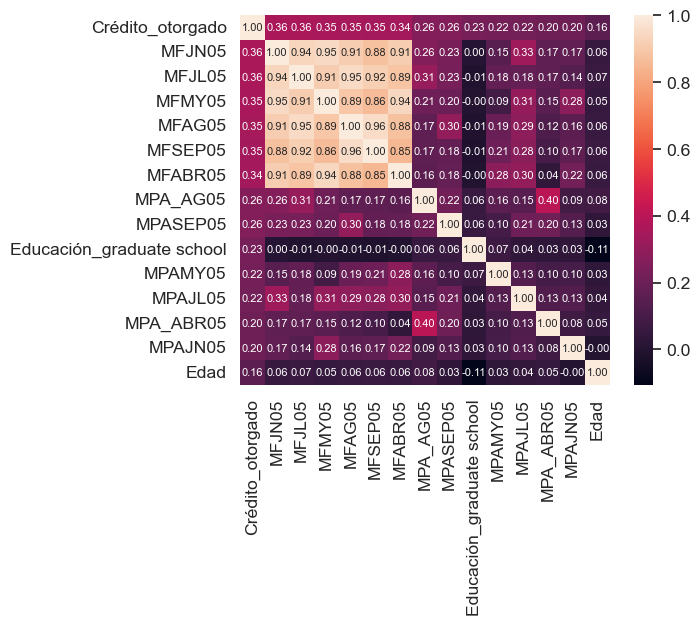

In [87]:
sns.set(font_scale = 1.15)

matriz_corr = sns.heatmap(cm, cbar = True, annot = True, square = True, fmt = ".2f", annot_kws = {"size":8,}, 
                yticklabels = cols.values, xticklabels = cols.values)


plt.show          #creo la matriz de correlación con las variables más relacionadas con el crédito
                 # se observa multicolinealidad entre las variables Montos de Facturas (cuadrado color naranja claro)

Correlación entre Monto de extracto de factura (Setiembre 2005) y el Crédito


Crédito_otorgado    MFJN05
Crédito_otorgado          1.000000  0.359819
MFJN05                    0.359819  1.000000

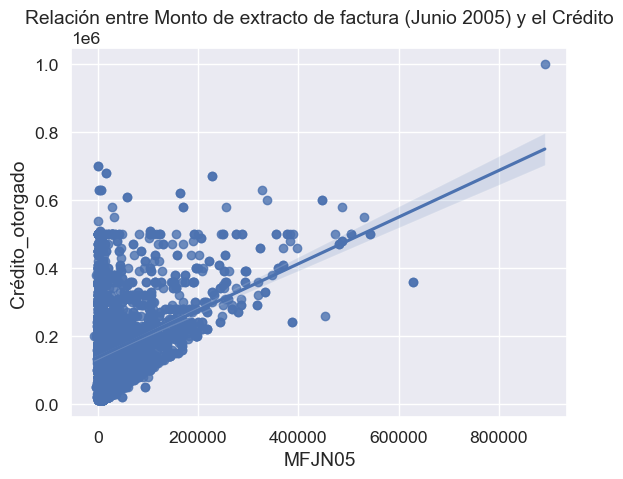

In [88]:
# graficamos a manera de comprobación una de las variables que tenga mayor correlación con crédito

ax = sns.regplot(x = "MFJN05", y = "Crédito_otorgado" ,data = study_credit)
print("Correlación entre Monto de extracto de factura (Setiembre 2005) y el Crédito") #correlación positiva baja (evidencia gráfica)

ax.set_title("Relación entre Monto de extracto de factura (Junio 2005) y el Crédito")


study_credit[["Crédito_otorgado","MFJN05"]].corr()

**Los Montos de Extracto Factura mes a mes(MFJL05,MFJN05,MFABR05,MFMY05,MFAG05,MFSEP05) 
revelan correlaciones positivas con el crédito otorgado**

**El comportamiento del cliente (efecto no significativo) junto con la Edad, HPAJN05 y HPMY05 (que tienen VIF >5) deben ser excluidos del modelo de predicción junto con el resto de variables que no pertenezcan al top 15 de variables relacionadas con el crédito**

In [89]:
study_credit

Crédito_otorgado  Estado_civil  Edad  HPSEP05  HPAG05  HPJL05  HPJN05  \
1                20000             1    24        2       2      -1      -1   
2               120000             2    26       -1       2       0       0   
3                90000             2    34        0       0       0       0   
4                50000             1    37        0       0       0       0   
5                50000             1    57       -1       0      -1       0   
...                ...           ...   ...      ...     ...     ...     ...   
3665            220000             1    32        0       0       0       0   
3666             70000             2    34        1       2       2       2   
3667            120000             2    37       -1       2       0       0   
3668            180000             2    32        0       0       0       0   
3669             50000             1    57        0       0       0       0   

      HPMY05  HPABR05  MFSEP05  ...  MPAMY05  MPA_ABR05  Género_female  \
1         -2       -2     3913  ...        0          0              1   
2          0        2     2682  ...        0       2000              1   
3          0        0    29239  ...     1000       5000              1   
4          0        0    46990  ...     1069       1000              1   
5          0        0     8617  ...      689        679              0   
...      ...      ...      ...  ...      ...        ...            ...   
3665       0        0   194961  ...     8010       8500              1   
3666       0        0    24208  ...     4000          0              1   
3667       0        2    16241  ...        0       1600              0   
3668       0        0    20730  ...     1000       1000              1   
3669       0        0    49017  ...     2000       1800              1   

      Género_male  Educación_graduate school  Educación_high school  \
1               0                          0                      0   
2               0                          0                      0   
3               0                          0                      0   
4               0                          0                      0   
5               1                          0                      0   
...           ...                        ...                    ...   
3665            0                          0                      0   
3666            0                          0                      0   
3667            1                          0                      0   
3668            0                          0                      0   
3669            0                          0                      1   

      Educación_other  Educación_university  Comportamiento_cliente_default  \
1                   0                     1                               1   
2                   0                     1                               1   
3                   0                     1                               0   
4                   0                     1                               0   
5                   0                     1                               0   
...               ...                   ...                             ...   
3665                0                     1                               0   
3666                0                     1                               0   
3667                0                     1                               1   
3668                0                     1                               0   
3669                0                     0                               0   

      Comportamiento_cliente_not default  
1                                      0  
2                                      0  
3                                      1  
4                                      1  
5                                      1  
...                                  ...  
3665                                   1  
3666                  

In [90]:
df_model = study_credit.copy(deep = True)# realizo una copia para eliminar las variables de no interés en el estudio
df_model

Crédito_otorgado  Estado_civil  Edad  HPSEP05  HPAG05  HPJL05  HPJN05  \
1                20000             1    24        2       2      -1      -1   
2               120000             2    26       -1       2       0       0   
3                90000             2    34        0       0       0       0   
4                50000             1    37        0       0       0       0   
5                50000             1    57       -1       0      -1       0   
...                ...           ...   ...      ...     ...     ...     ...   
3665            220000             1    32        0       0       0       0   
3666             70000             2    34        1       2       2       2   
3667            120000             2    37       -1       2       0       0   
3668            180000             2    32        0       0       0       0   
3669             50000             1    57        0       0       0       0   

      HPMY05  HPABR05  MFSEP05  ...  MPAMY05  MPA_ABR05  Género_female  \
1         -2       -2     3913  ...        0          0              1   
2          0        2     2682  ...        0       2000              1   
3          0        0    29239  ...     1000       5000              1   
4          0        0    46990  ...     1069       1000              1   
5          0        0     8617  ...      689        679              0   
...      ...      ...      ...  ...      ...        ...            ...   
3665       0        0   194961  ...     8010       8500              1   
3666       0        0    24208  ...     4000          0              1   
3667       0        2    16241  ...        0       1600              0   
3668       0        0    20730  ...     1000       1000              1   
3669       0        0    49017  ...     2000       1800              1   

      Género_male  Educación_graduate school  Educación_high school  \
1               0                          0                      0   
2               0                          0                      0   
3               0                          0                      0   
4               0                          0                      0   
5               1                          0                      0   
...           ...                        ...                    ...   
3665            0                          0                      0   
3666            0                          0                      0   
3667            1                          0                      0   
3668            0                          0                      0   
3669            0                          0                      1   

      Educación_other  Educación_university  Comportamiento_cliente_default  \
1                   0                     1                               1   
2                   0                     1                               1   
3                   0                     1                               0   
4                   0                     1                               0   
5                   0                     1                               0   
...               ...                   ...                             ...   
3665                0                     1                               0   
3666                0                     1                               0   
3667                0                     1                               1   
3668                0                     1                               0   
3669                0                     0                               0   

      Comportamiento_cliente_not default  
1                                      0  
2                                      0  
3                                      1  
4                                      1  
5                                      1  
...                                  ...  
3665                                   1  
3666                  

In [91]:
# elimino las variables de no interés

df_model1 = df_model.drop(["Comportamiento_cliente_not default","Edad","Género_female","Género_male", "Comportamiento_cliente_default","Educación_university",
                          "Educación_high school","Educación_other","Estado_civil","HPSEP05","HPABR05","HPMY05","HPJN05","HPJL05","HPAG05"], axis=1)


In [92]:
corr_model = df_model1.corr() # realizo una nueva correlación con las variables seleccionadas

In [93]:
corr_model #las variables montos de facturas evidencian fuertes correlaciones entre ellas mismas

Crédito_otorgado   MFSEP05    MFAG05    MFJL05  \
Crédito_otorgado                   1.000000  0.347138  0.350444  0.356201   
MFSEP05                            0.347138  1.000000  0.955286  0.915061   
MFAG05                             0.350444  0.955286  1.000000  0.949795   
MFJL05                             0.356201  0.915061  0.949795  1.000000   
MFJN05                             0.359819  0.876839  0.911486  0.935293   
MFMY05                             0.352102  0.861812  0.893945  0.912861   
MFABR05                            0.342870  0.852255  0.878822  0.886703   
MPASEP05                           0.259924  0.175089  0.301670  0.229869   
MPA_AG05                           0.261706  0.165764  0.166501  0.311576   
MPAJL05                            0.218779  0.276052  0.287311  0.182641   
MPAJN05                            0.201622  0.167956  0.161132  0.138855   
MPAMY05                            0.223146  0.206607  0.191704  0.177430   
MPA_ABR05                          0.203018  0.101415  0.119862  0.166257   
Educación_graduate school          0.228166 -0.014006 -0.007324 -0.008751   

                             MFJN05    MFMY05   MFABR05  MPASEP05  MPA_AG05  \
Crédito_otorgado           0.359819  0.352102  0.342870  0.259924  0.261706   
MFSEP05                    0.876839  0.861812  0.852255  0.175089  0.165764   
MFAG05                     0.911486  0.893945  0.878822  0.301670  0.166501   
MFJL05                     0.935293  0.912861  0.886703  0.229869  0.311576   
MFJN05                     1.000000  0.947705  0.910955  0.231430  0.261247   
MFMY05                     0.947705  1.000000  0.943535  0.198788  0.206075   
MFABR05                    0.910955  0.943535  1.000000  0.181536  0.157661   
MPASEP05                   0.231430  0.198788  0.181536  1.000000  0.216775   
MPA_AG05                   0.261247  0.206075  0.157661  0.216775  1.000000   
MPAJL05                    0.327753  0.305226  0.300458  0.205745  0.148865   
MPAJN05                    0.171755  0.282446  0.218160  0.132829  0.091632   
MPAMY05                    0.150345  0.089624  0.283472  0.096414  0.157965   
MPA_ABR05                  0.165695  0.154792  0.039420  0.201716  0.401795   
Educación_graduate school  0.004060 -0.002019 -0.004344  0.058912  0.061534   

                            MPAJL05   MPAJN05   MPAMY05  MPA_ABR05  \
Crédito_otorgado           0.218779  0.201622  0.223146   0.203018   
MFSEP05                    0.276052  0.167956  0.206607   0.101415   
MFAG05                     0.287311  0.161132  0.191704   0.119862   
MFJL05                     0.182641  0.138855  0.177430   0.166257   
MFJN05                     0.327753  0.171755  0.150345   0.165695   
MFMY05                     0.305226  0.282446  0.089624   0.154792   
MFABR05                    0.300458  0.218160  0.283472   0.039420   
MPASEP05                   0.205745  0.132829  0.096414   0.201716   
MPA_AG05                   0.148865  0.091632  0.157965   0.401795   
MPAJL05                    1.000000  0.132227  0.134967   0.125586   
MPAJN05                    0.132227  1.000000  0.100181   0.080764   
MPAMY05                    0.134967  0.100181  1.000000   0.096206   
MPA_ABR05                  0.125586  0.080764  0.096206   1.000000   
Educación_graduate school  0.039194  0.034476  0.067290   0.028429   

                           Educación_graduate school  
Crédito_otorgado                            0.228166  
MFSEP05                                    -0.014006  
MFAG05                                     -0.007324  
MFJL05                                     -0.008751  
MFJN05                                      0.004060  
MFMY05                                     -0.002019  
MFABR05                                    -0.004344  
MPASEP05                                    0.058912  
MPA_AG05                                    0.061534  
MPAJL05                                     0.039194  
MPAJN05                      

<function matplotlib.pyplot.show(close=None, block=None)>

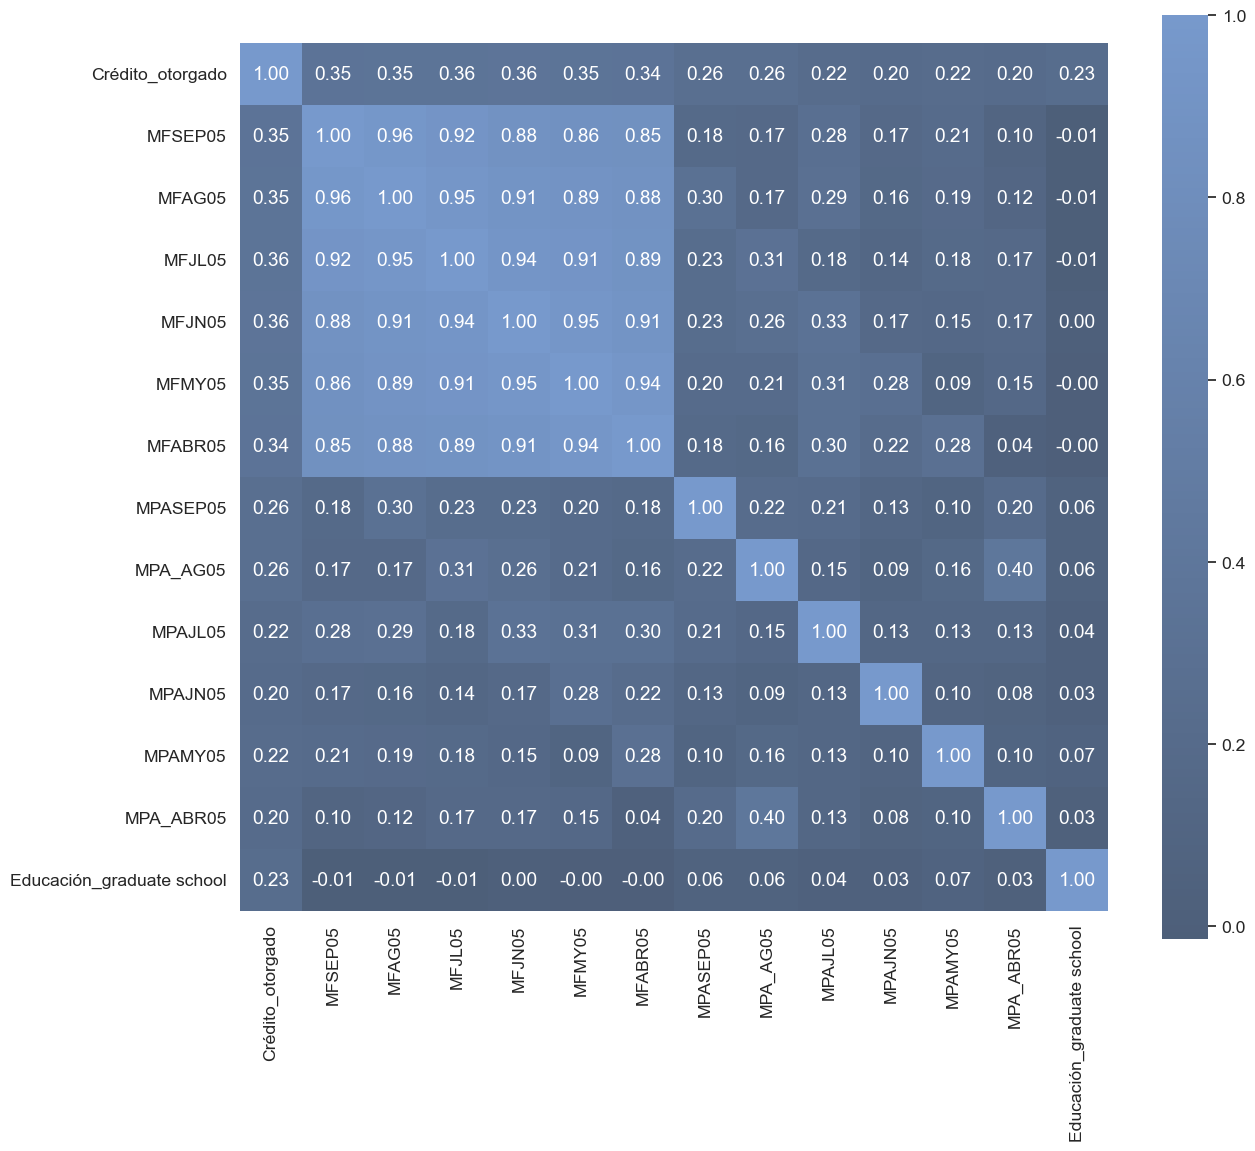

In [94]:
plt.figure(figsize=(14,12))

cmap = sns.dark_palette("#79C", as_cmap=True)

_ = sns.heatmap(corr_model, center=0, annot=True, 
                fmt='.2f', square=True, cmap=cmap)
 
plt.show

**Visualizamos el cuadrado celeste que se compone de las variables de alta colinealidad ( Montos de Facturas) Revisaremos más adelante el Factor de inflación de varianza (1/(1-R^2 ) = FIV >=5) para ver si hay impacto antes de correr el modelo**
-------------------------------------------------------------------------------------------------------------------------------

**Análisis de Componentes Principales con las variables detectadas en el análisis de correlación anterior**

In [95]:
std = StandardScaler()

In [96]:
fit_model = df_model1.copy(deep = True)

In [97]:
std_df = std.fit_transform(fit_model)         #Normalización de los datos (media = 0 y varianza = 1)

In [98]:
std_df 

array([[-1.12965476, -0.61733135, -0.61671551, ..., -0.29276449,
        -0.24799921, -0.78612808],
       [-0.35742119, -0.63345162, -0.63515099, ..., -0.29276449,
        -0.1524075 , -0.78612808],
       [-0.58909126, -0.28568067, -0.47045001, ..., -0.23528855,
        -0.00901994, -0.78612808],
       ...,
       [-0.35742119, -0.45589292, -0.43493126, ..., -0.29276449,
        -0.17152584, -0.78612808],
       [ 0.10591895, -0.39710828, -0.42921452, ..., -0.23528855,
        -0.20020336, -0.78612808],
       [-0.89798469, -0.02668252,  0.02039961, ..., -0.17781262,
        -0.16196667, -0.78612808]])

In [99]:
pca = PCA().fit(std_df) 

In [100]:
pca.explained_variance_ratio_ # varianza explicada por cada componente

array([0.43603652, 0.11821621, 0.07896702, 0.06957414, 0.06646547,
       0.06291499, 0.05622375, 0.04395605, 0.0424791 , 0.01485122,
       0.00462385, 0.00296854, 0.00142253, 0.00130064])

In [101]:
# reviso la varianza explicada por cada componente

df_pc = pd.DataFrame({"PC":["PC1","PC2","PC3","PC4","PC5","PC6","PC7","PC8","PC9",
                     "PC10","PC11","PC12","PC13","PC14"],"variance":pca.explained_variance_ratio_ })
df_pc                                        

PC  variance
0    PC1  0.436037
1    PC2  0.118216
2    PC3  0.078967
3    PC4  0.069574
4    PC5  0.066465
5    PC6  0.062915
6    PC7  0.056224
7    PC8  0.043956
8    PC9  0.042479
9   PC10  0.014851
10  PC11  0.004624
11  PC12  0.002969
12  PC13  0.001423
13  PC14  0.001301

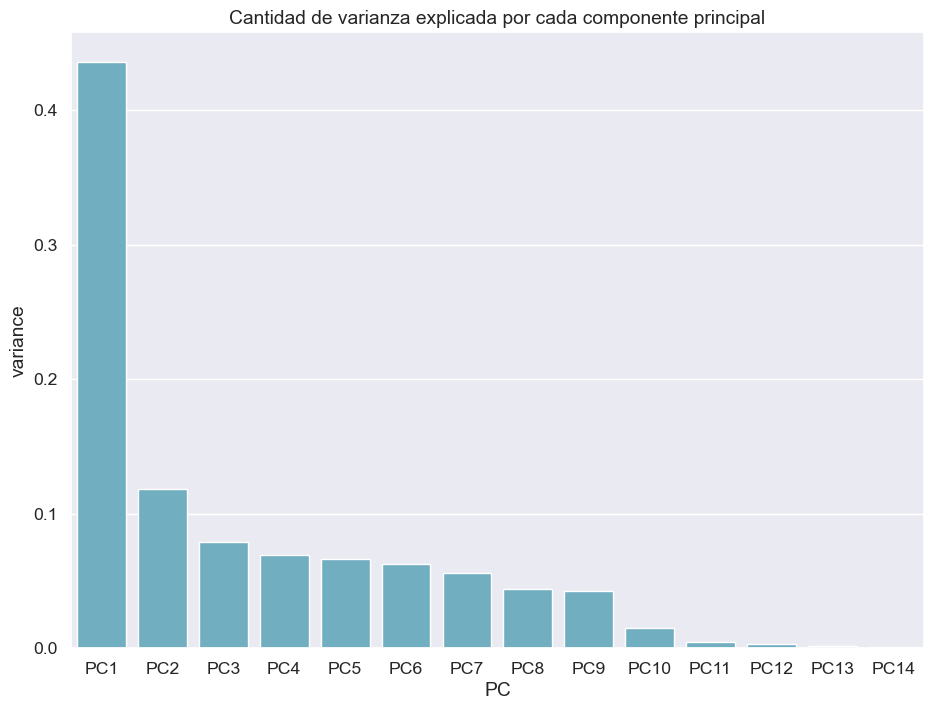

In [102]:
plt.figure(figsize=(11,8))
sns.barplot(x= "PC", y= "variance", data= df_pc, color = "c") # Los componentes 1 y 2 representan el 55.43% de la varianza
plt.title ("Cantidad de varianza explicada por cada componente principal")
plt.show()

In [103]:
var = pca.explained_variance_ratio_

In [104]:
np.cumsum(var) # 6 componentes principales explican > 80% de la varianza

array([0.43603652, 0.55425273, 0.63321975, 0.70279389, 0.76925935,
       0.83217434, 0.88839808, 0.93235413, 0.97483323, 0.98968445,
       0.9943083 , 0.99727684, 0.99869936, 1.        ])

In [105]:
np.where((np.cumsum(var)>0.8) & (np.cumsum(var)<0.9)) # Identifico los componentes que logran explicar >80% de la varianza

(array([5, 6], dtype=int64),)

**6 componentes principales**

In [106]:
pca_v2 = PCA(n_components=6).fit_transform(std_df) #genero el PCA con los componentes identificados

In [107]:
pca_v2.shape  # reviso que tengamos 6 columnas correspondientes a los componentes principales elegidos

(3668, 6)

In [108]:
pca_v2 = PCA(n_components=6)
pca_eigen_values = pca_v2.fit_transform(std_df)

In [109]:
pca_v2.components_.T.shape # reduzco la dimensionalidad de los datos 

(14, 6)

In [110]:
porc_var = [0.43603652, 0.55425273, 0.63321975, 0.70279389, 0.76925935,
       0.83217434]

In [111]:
df_pc1 = pd.DataFrame({"PC":["PC1","PC2","PC3","PC4","PC5","PC6"],"cumsum variance": porc_var})
df_pc1                                                       # reviso la varianza explicada por cada componente

PC  cumsum variance
0  PC1         0.436037
1  PC2         0.554253
2  PC3         0.633220
3  PC4         0.702794
4  PC5         0.769259
5  PC6         0.832174

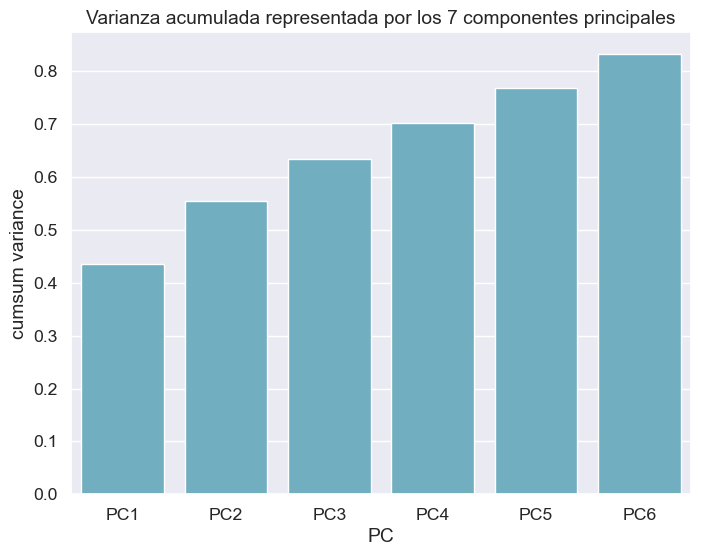

In [112]:
plt.figure(figsize=(8,6))
sns.barplot(x= "PC", y= "cumsum variance", data= df_pc1, color = "c") # Los 6 componentes representan el 83.21 % de la varianza
plt.title ("Varianza acumulada representada por los 7 componentes principales")
plt.show()

In [113]:
list_namepca=[f"PC{i}" for i in range (1,7)]

In [114]:
set_var = df_model1.columns  # variables de los componentes principales
set_var

Index(['Crédito_otorgado', 'MFSEP05', 'MFAG05', 'MFJL05', 'MFJN05', 'MFMY05',
       'MFABR05', 'MPASEP05', 'MPA_AG05', 'MPAJL05', 'MPAJN05', 'MPAMY05',
       'MPA_ABR05', 'Educación_graduate school'],
      dtype='object')

In [115]:
df_pca_loading = pd.DataFrame(pca_v2.components_.T,columns=list_namepca,index =set_var) 

In [116]:
df_pca_loading.head(20) # reviso los valores loadings para determinar el peso de las variables en cada CP 

PC1       PC2       PC3       PC4       PC5  \
Crédito_otorgado           0.190369  0.361666 -0.294674 -0.106614 -0.077787   
MFSEP05                    0.374879 -0.153446 -0.003743 -0.061424  0.028664   
MFAG05                     0.385981 -0.129192  0.015697 -0.038873 -0.030267   
MFJL05                     0.385824 -0.105132  0.106399 -0.148333 -0.015008   
MFJN05                     0.387570 -0.097062  0.060159 -0.048333 -0.055881   
MFMY05                     0.384188 -0.124801  0.024468  0.039256 -0.114078   
MFABR05                    0.377393 -0.152787 -0.083096 -0.000909  0.091587   
MPASEP05                   0.128454  0.350673  0.057792  0.242083 -0.263633   
MPA_AG05                   0.127017  0.468352  0.375534 -0.177640  0.073647   
MPAJL05                    0.150653  0.200901 -0.121173  0.407383  0.011493   
MPAJN05                    0.105995  0.173846 -0.280671  0.667210 -0.085262   
MPAMY05                    0.104737  0.233716 -0.295039 -0.075169  0.863262   
MPA_ABR05                  0.086298  0.476235  0.467931 -0.079422 -0.015544   
Educación_graduate school  0.012848  0.274292 -0.588754 -0.494186 -0.373725   

                                PC6  
Crédito_otorgado          -0.050801  
MFSEP05                   -0.000428  
MFAG05                     0.061473  
MFJL05                    -0.074211  
MFJN05                     0.013902  
MFMY05                    -0.090086  
MFABR05                   -0.012571  
MPASEP05                   0.392986  
MPA_AG05                  -0.160112  
MPAJL05                    0.625495  
MPAJN05                   -0.617543  
MPAMY05                    0.035929  
MPA_ABR05                 -0.157806  
Educación_graduate school -0.028210

In [117]:
df_pca_loading[["PC1"]].apply(lambda x:sum(x**2))  # comprobamos que la sumatoria de los pesos al cuadrado = 1

PC1    1.0
dtype: float64

In [118]:
PC1 = pca.fit_transform(std_df)[:,0]
PC2 = pca.fit_transform(std_df)[:,1]        # seleccionamos 2 dimensiones que representen los loadings mayores
values= pca_v2.components_

In [119]:
scalePC1 = 1.0/(PC1.max() - PC1.min())
scalePC2 = 1.0/(PC2.max() - PC2.min())
features = set_var

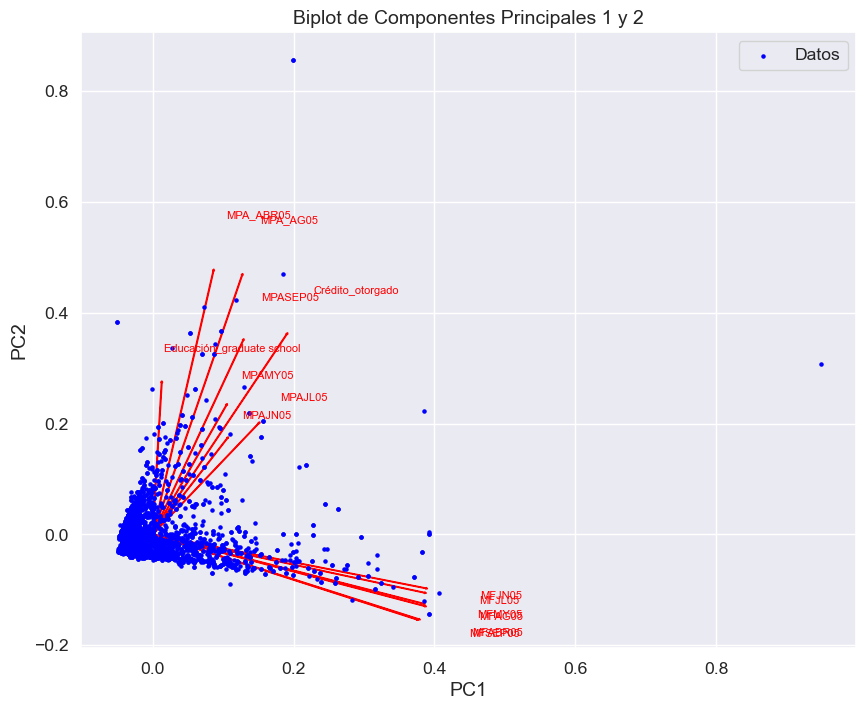

In [120]:

fig, ax = plt.subplots(figsize=(10, 8))

# Código para calcular valores de escala y cargar los componentes principales en values

for i, feature in enumerate(features):
    ax.arrow(0, 0, values[0, i], values[1, i],
             head_width=0.003,
             head_length=0.003,                          #Graficamos un biplot con los 2 componentes principales
             color="red")
    ax.text(values[0, i] * 1.2,
            values[1, i] * 1.2,
            feature, color="red", fontsize=8)

# Código para generar los puntos de las observaciones en PC1 y PC2
points = ax.scatter(PC1 * scalePC1, PC2 * scalePC2, s=5, color='blue')

ax.set_xlabel("PC1", fontsize=14)
ax.set_ylabel("PC2", fontsize=14)
ax.set_title("Biplot de Componentes Principales 1 y 2", fontsize=14)

# Agregar leyenda para los puntos de datos
ax.legend([points], ['Datos'], loc='best')

plt.show()

**Se revisan las variables de mayor scores y se determina que la mejor dimensionalidad es PC1 Y PC2, donde Monto de pago anterior y Monto de Factura mes a mes están muy correlacionadas entre ellas (colinealidad), formando ángulos muy agudos entre sus vectores. Los vectores de monto de pago atrasado forman un menor ángulo con el vector crédito, sin embargo no tienen mejor representación en el plano que los vectores de montos de facturas mes a mes (el tamaño de sus flechas) y al formar angulos agudos con la variable crédito, podemos decir que las facturas serían mejor la opción de correlación. Las variables de Monto de Factura mes a mes aportan más loadings o scores al PC1 por su cercanía, mientras Educación_graduated_school y Monto de pago anterior abril y agosto aportan más loadings o scores al PC2. También se evidencia la presencia de valores outliers (2 puntos azules a la distancia)**


In [121]:
#revisamos si las variables obtenidas en el PCA tienen VIF >=5

from statsmodels.stats.outliers_influence import variance_inflation_factor

# Seleccionar solo las variables numéricas en las que se calculará el VIF
numeric_vars = df_model1[["MFAG05", "MFSEP05", "MFJL05", "MFABR05", ]]

# Crear DataFrame para almacenar los resultados del VIF
vif = pd.DataFrame()
vif["Variable"] = numeric_vars.columns
vif["VIF"] = [variance_inflation_factor(numeric_vars.values, i) for i in range(numeric_vars.shape[1])]

# Imprimir los resultados
print(vif)                              # no se encuentran valores VIF >= 5 por lo que evitamos problemas de multicolinealidad


  Variable       VIF
0   MFAG05  0.000300
1  MFSEP05  0.000464
2   MFJL05 -0.001398
3  MFABR05  0.000158


**Con la información obtenida apartir de los análisis gráficos, análisis de correlación, Componentes Principales y VIF, identificamos las variables predictoras de intéres para generar un modelo de regresión lineal**

**Modelo de Regresión Lineal**
-------------------------------------------

In [122]:
# se detectan outliers presentes con el método espacial a distancia de Mahalanobis y posteriormente se eliminan

from scipy.spatial.distance import mahalanobis

# Copiar el DataFrame original
df_model2 = df_model.copy(deep=True)

def remove_outliers_mahalanobis(df_model2, threshold=3, max_iter=10):
    """
    Elimina los outliers utilizando el método de eliminación iterativa de distancia de Mahalanobis.

    Args:
        df_model2 (pandas.DataFrame): El DataFrame que contiene los datos.
        threshold (float): El umbral para considerar un valor como outlier. Por defecto es 3 (3 desv.estándar).
        max_iter (int): El número máximo de iteraciones. Por defecto es 10.

    Returns:
        pandas.DataFrame: El DataFrame con los outliers eliminados.
    """
    df_clean = df_model2.copy()

    for _ in range(max_iter):                           
        # Calcular la matriz de covarianza y su inversa
        cov_matrix = np.cov(df_clean.values.T)
        inv_cov_matrix = np.linalg.inv(cov_matrix)

        # Calcular la media y desviación estándar de cada columna
        column_means = df_clean.mean()
        column_std = df_clean.std()

        # Calcular la distancia de Mahalanobis para cada punto
        mahalanobis_dist = []
        for i in range(len(df_clean)):
            point = df_clean.iloc[i].values
            mean = column_means.values
            dist = mahalanobis(point, mean, inv_cov_matrix)
            mahalanobis_dist.append(dist)

        # Calcular la media y desviación estándar de la distancia de Mahalanobis
        dist_mean = np.mean(mahalanobis_dist)
        dist_std = np.std(mahalanobis_dist)

        # Identificar los outliers basados en la distancia de Mahalanobis
        outliers = mahalanobis_dist > threshold * dist_std + dist_mean

        # Eliminar los outliers del DataFrame
        df_clean = df_clean[~outliers]

        # Detener la iteración si no se encontraron outliers
        if not np.any(outliers):
            break

    return df_clean

# Aplicar el método de eliminación iterativa de distancia de Mahalanobis a df_model2
df_clean = remove_outliers_mahalanobis(df_model2)

# Imprimir el DataFrame limpio
df_clean


Crédito_otorgado  Estado_civil  Edad  HPSEP05  HPAG05  HPJL05  HPJN05  \
1                20000             1    24        2       2      -1      -1   
2               120000             2    26       -1       2       0       0   
3                90000             2    34        0       0       0       0   
4                50000             1    37        0       0       0       0   
5                50000             1    57       -1       0      -1       0   
...                ...           ...   ...      ...     ...     ...     ...   
3665            220000             1    32        0       0       0       0   
3666             70000             2    34        1       2       2       2   
3667            120000             2    37       -1       2       0       0   
3668            180000             2    32        0       0       0       0   
3669             50000             1    57        0       0       0       0   

      HPMY05  HPABR05  MFSEP05  ...  MPAMY05  MPA_ABR05  Género_female  \
1         -2       -2     3913  ...        0          0              1   
2          0        2     2682  ...        0       2000              1   
3          0        0    29239  ...     1000       5000              1   
4          0        0    46990  ...     1069       1000              1   
5          0        0     8617  ...      689        679              0   
...      ...      ...      ...  ...      ...        ...            ...   
3665       0        0   194961  ...     8010       8500              1   
3666       0        0    24208  ...     4000          0              1   
3667       0        2    16241  ...        0       1600              0   
3668       0        0    20730  ...     1000       1000              1   
3669       0        0    49017  ...     2000       1800              1   

      Género_male  Educación_graduate school  Educación_high school  \
1               0                          0                      0   
2               0                          0                      0   
3               0                          0                      0   
4               0                          0                      0   
5               1                          0                      0   
...           ...                        ...                    ...   
3665            0                          0                      0   
3666            0                          0                      0   
3667            1                          0                      0   
3668            0                          0                      0   
3669            0                          0                      1   

      Educación_other  Educación_university  Comportamiento_cliente_default  \
1                   0                     1                               1   
2                   0                     1                               1   
3                   0                     1                               0   
4                   0                     1                               0   
5                   0                     1                               0   
...               ...                   ...                             ...   
3665                0                     1                               0   
3666                0                     1                               0   
3667                0                     1                               1   
3668                0                     1                               0   
3669                0                     0                               0   

      Comportamiento_cliente_not default  
1                                      0  
2                                      0  
3                                      1  
4                                      1  
5                                      1  
...                                  ...  
3665                                   1  
3666                  

In [123]:
# identificados y eliminados los outliers procedemos a normalizar los datos

from sklearn.preprocessing import RobustScaler
import pandas as pd

# Crear una instancia del escalador RobustScaler
scaler = RobustScaler()

# Aplicar la normalización por rango intercuartil a df_clean
df_normalized_iqr = scaler.fit_transform(df_clean)

# Crear un nuevo DataFrame con los datos normalizados
df_normalized_iqr = pd.DataFrame(df_normalized_iqr, columns=df_clean.columns)

df_normalized_iqr


Crédito_otorgado  Estado_civil      Edad  HPSEP05  HPAG05  HPJL05  \
0            -0.666667          -1.0 -0.769231      2.0     2.0    -1.0   
1            -0.111111           0.0 -0.615385     -1.0     2.0     0.0   
2            -0.277778           0.0  0.000000      0.0     0.0     0.0   
3            -0.500000          -1.0  0.230769      0.0     0.0     0.0   
4            -0.500000          -1.0  1.769231     -1.0     0.0    -1.0   
...                ...           ...       ...      ...     ...     ...   
3663          0.444444          -1.0 -0.153846      0.0     0.0     0.0   
3664         -0.388889           0.0  0.000000      1.0     2.0     2.0   
3665         -0.111111           0.0  0.230769     -1.0     2.0     0.0   
3666          0.222222           0.0 -0.153846      0.0     0.0     0.0   
3667         -0.500000          -1.0  1.769231      0.0     0.0     0.0   

      HPJN05  HPMY05  HPABR05   MFSEP05  ...   MPAMY05  MPA_ABR05  \
0       -1.0    -2.0     -2.0 -0.284675  ... -0.396223   -0.33450   
1        0.0     0.0      2.0 -0.305008  ... -0.396223    0.16550   
2        0.0     0.0      0.0  0.133641  ... -0.132074    0.91550   
3        0.0     0.0      0.0  0.426839  ... -0.113848   -0.08450   
4        0.0     0.0      0.0 -0.206978  ... -0.214224   -0.16475   
...      ...     ...      ...       ...  ...       ...        ...   
3663     0.0     0.0      0.0  2.870914  ...  1.719606    1.79050   
3664     2.0     0.0      0.0  0.050543  ...  0.660371   -0.33450   
3665     0.0     0.0      2.0 -0.081050  ... -0.396223    0.06550   
3666     0.0     0.0      0.0 -0.006904  ... -0.132074   -0.08450   
3667     0.0     0.0      0.0  0.460319  ...  0.132074    0.11550   

      Género_female  Género_male  Educación_graduate school  \
0               0.0          0.0                        0.0   
1               0.0          0.0                        0.0   
2               0.0          0.0                        0.0   
3               0.0          0.0                        0.0   
4              -1.0          1.0                        0.0   
...             ...          ...                        ...   
3663            0.0          0.0                        0.0   
3664            0.0          0.0                        0.0   
3665           -1.0          1.0                        0.0   
3666            0.0          0.0                        0.0   
3667            0.0          0.0                        0.0   

      Educación_high school  Educación_other  Educación_university  \
0                       0.0              0.0                   1.0   
1                       0.0              0.0                   1.0   
2                       0.0              0.0                   1.0   
3                       0.0              0.0                   1.0   
4                       0.0              0.0                   1.0   
...                     ...              ...                   ...   
3663                    0.0              0.0                   1.0   
3664                    0.0              0.0                   1.0   
3665                    0.0              0.0                   1.0   
3666                    0.0              0.0                   1.0   
3667                    1.0              0.0                   0.0   

      Comportamiento_cliente_default  Comportamiento_cliente_not default  
0                                1.0                                -1.0  
1                                1.0                                -1.0  
2                                0.0                                 0.0  
3                                0.0                                 0.0  
4                                0.0                                 0.0  
...                              ...                                 ...  
3663                             0.0                                 0.0  
3664                             0.0                                 0.0  
366

In [124]:
# volvemos a detectar y eliminar outliers residuales que persisten en los datos

from scipy.spatial.distance import mahalanobis

def remove_outliers_mahalanobis(df, threshold=3, max_iter=10):
    """
    Elimina los outliers utilizando el método de eliminación iterativa de distancia de Mahalanobis.

    Args:
        df (pandas.DataFrame): El DataFrame que contiene los datos normalizados.
        threshold (float): El umbral para considerar un valor como outlier. Por defecto es 3.
        max_iter (int): El número máximo de iteraciones. Por defecto es 10.

    Returns:
        pandas.DataFrame: El DataFrame con los outliers eliminados.
    """
    df_clean = df.copy()

    for _ in range(max_iter):
        # Calcular la matriz de covarianza y su inversa
        cov_matrix = np.cov(df_clean.values.T)
        
        # Regularizar la matriz de covarianza para evitar singularidad
        reg_cov_matrix = cov_matrix + np.eye(cov_matrix.shape[0]) * 1e-8
        inv_cov_matrix = np.linalg.inv(reg_cov_matrix)

        # Calcular la media y desviación estándar de cada columna
        column_means = df_clean.mean()
        column_std = df_clean.std()

        # Calcular la distancia de Mahalanobis para cada punto
        mahalanobis_dist = []
        for i in range(len(df_clean)):
            point = df_clean.iloc[i].values
            mean = column_means.values
            dist = mahalanobis(point, mean, inv_cov_matrix)
            mahalanobis_dist.append(dist)

        # Calcular la media y desviación estándar de la distancia de Mahalanobis
        dist_mean = np.mean(mahalanobis_dist)
        dist_std = np.std(mahalanobis_dist)

        # Identificar los outliers basados en la distancia de Mahalanobis
        outliers = mahalanobis_dist > threshold * dist_std + dist_mean

        # Eliminar los outliers del DataFrame
        df_clean = df_clean[~outliers]

        # Detener la iteración si no se encontraron outliers
        if not np.any(outliers):
            break

    return df_clean

# Aplicar el método de eliminación iterativa de distancia de Mahalanobis a df_normalized_iqr
df_clean_mahalanobis = remove_outliers_mahalanobis(df_normalized_iqr)

# Imprimir el DataFrame limpio
df_clean_mahalanobis


Crédito_otorgado  Estado_civil      Edad  HPSEP05  HPAG05  HPJL05  \
0            -0.666667          -1.0 -0.769231      2.0     2.0    -1.0   
1            -0.111111           0.0 -0.615385     -1.0     2.0     0.0   
2            -0.277778           0.0  0.000000      0.0     0.0     0.0   
3            -0.500000          -1.0  0.230769      0.0     0.0     0.0   
4            -0.500000          -1.0  1.769231     -1.0     0.0    -1.0   
...                ...           ...       ...      ...     ...     ...   
3663          0.444444          -1.0 -0.153846      0.0     0.0     0.0   
3664         -0.388889           0.0  0.000000      1.0     2.0     2.0   
3665         -0.111111           0.0  0.230769     -1.0     2.0     0.0   
3666          0.222222           0.0 -0.153846      0.0     0.0     0.0   
3667         -0.500000          -1.0  1.769231      0.0     0.0     0.0   

      HPJN05  HPMY05  HPABR05   MFSEP05  ...   MPAMY05  MPA_ABR05  \
0       -1.0    -2.0     -2.0 -0.284675  ... -0.396223   -0.33450   
1        0.0     0.0      2.0 -0.305008  ... -0.396223    0.16550   
2        0.0     0.0      0.0  0.133641  ... -0.132074    0.91550   
3        0.0     0.0      0.0  0.426839  ... -0.113848   -0.08450   
4        0.0     0.0      0.0 -0.206978  ... -0.214224   -0.16475   
...      ...     ...      ...       ...  ...       ...        ...   
3663     0.0     0.0      0.0  2.870914  ...  1.719606    1.79050   
3664     2.0     0.0      0.0  0.050543  ...  0.660371   -0.33450   
3665     0.0     0.0      2.0 -0.081050  ... -0.396223    0.06550   
3666     0.0     0.0      0.0 -0.006904  ... -0.132074   -0.08450   
3667     0.0     0.0      0.0  0.460319  ...  0.132074    0.11550   

      Género_female  Género_male  Educación_graduate school  \
0               0.0          0.0                        0.0   
1               0.0          0.0                        0.0   
2               0.0          0.0                        0.0   
3               0.0          0.0                        0.0   
4              -1.0          1.0                        0.0   
...             ...          ...                        ...   
3663            0.0          0.0                        0.0   
3664            0.0          0.0                        0.0   
3665           -1.0          1.0                        0.0   
3666            0.0          0.0                        0.0   
3667            0.0          0.0                        0.0   

      Educación_high school  Educación_other  Educación_university  \
0                       0.0              0.0                   1.0   
1                       0.0              0.0                   1.0   
2                       0.0              0.0                   1.0   
3                       0.0              0.0                   1.0   
4                       0.0              0.0                   1.0   
...                     ...              ...                   ...   
3663                    0.0              0.0                   1.0   
3664                    0.0              0.0                   1.0   
3665                    0.0              0.0                   1.0   
3666                    0.0              0.0                   1.0   
3667                    1.0              0.0                   0.0   

      Comportamiento_cliente_default  Comportamiento_cliente_not default  
0                                1.0                                -1.0  
1                                1.0                                -1.0  
2                                0.0                                 0.0  
3                                0.0                                 0.0  
4                                0.0                                 0.0  
...                              ...                                 ...  
3663                             0.0                                 0.0  
3664                             0.0                                 0.0  
366

In [125]:
# Utilizamos la transformación PowerTransformer con el objetivo de ajustar los datos a una distribución más simétrica 
#(eliminar el sesgo positivo de los datos) y poder emular a una distribución normal. 

from sklearn.preprocessing import PowerTransformer

# Crear una instancia del PowerTransformer
power_transformer = PowerTransformer()

# Aplicar la transformación de potencia a df_normalized_iqr
df_power_transformed = power_transformer.fit_transform(df_clean_mahalanobis)

# Crear un nuevo DataFrame con los datos transformados
df_power_transformed = pd.DataFrame(df_power_transformed, columns=df_clean_mahalanobis.columns)

df_power_transformed.head()

Crédito_otorgado  Estado_civil      Edad   HPSEP05    HPAG05    HPJL05  \
0         -1.440064     -1.102365 -1.421119  1.574822  1.536064 -0.682918   
1          0.009837      0.739776 -1.071830 -0.942705  1.536064  0.247444   
2         -0.355087      0.739776  0.074344  0.083494  0.220976  0.247444   
3         -0.934455     -1.102365  0.398085  0.083494  0.220976  0.247444   
4         -0.934455     -1.102365  1.827692 -0.942705  0.220976 -0.682918   

     HPJN05    HPMY05   HPABR05   MFSEP05  ...   MPAMY05  MPA_ABR05  \
0 -0.624206 -1.736933 -1.668342 -0.936941  ... -1.219824  -1.159228   
1  0.316913  0.321224  1.653726 -1.020223  ... -1.219824   0.449643   
2  0.316913  0.321224  0.349619  0.264833  ... -0.244365   1.307785   
3  0.316913  0.321224  0.349619  0.709386  ... -0.191047  -0.168250   
4  0.316913  0.321224  0.349619 -0.642156  ... -0.506043  -0.440375   

   Género_female  Género_male  Educación_graduate school  \
0       0.848753    -0.848753                  -0.761171   
1       0.848753    -0.848753                  -0.761171   
2       0.848753    -0.848753                  -0.761171   
3       0.848753    -0.848753                  -0.761171   
4      -1.178199     1.178199                  -0.761171   

   Educación_high school  Educación_other  Educación_university  \
0               -0.45942              0.0              1.085924   
1               -0.45942              0.0              1.085924   
2               -0.45942              0.0              1.085924   
3               -0.45942              0.0              1.085924   
4               -0.45942              0.0              1.085924   

   Comportamiento_cliente_default  Comportamiento_cliente_not default  
0                        1.829235                           -1.829235  
1                        1.829235                           -1.829235  
2                       -0.546677                            0.546677  
3                       -0.546677                            0.546677  
4                       -0.546677                            0.546677  

[5 rows x 29 columns]

In [126]:
# Normalizamos por última vez , ya que se tuvo que volver a eliminar outliers.

from sklearn.preprocessing import RobustScaler

# Crear una instancia del escalador RobustScaler
scaler = RobustScaler()

# Aplicar la normalización por rango intercuartil a df_clean_mahalanobis
df_normalized_iqr = scaler.fit_transform(df_power_transformed)

# Crear un nuevo DataFrame con los datos normalizados
df_normalized_iqr = pd.DataFrame(df_normalized_iqr, columns=df_power_transformed.columns)

df_normalized_iqr.head()


Crédito_otorgado  Estado_civil      Edad   HPSEP05    HPAG05  HPJL05  \
0         -0.840134          -1.0 -0.909834  0.813623  1.403177    -1.0   
1          0.000000           0.0 -0.678721 -0.559862  1.403177     0.0   
2         -0.211452           0.0  0.079664  0.000000  0.000000     0.0   
3         -0.547163          -1.0  0.293872  0.000000  0.000000     0.0   
4         -0.547163          -1.0  1.239795 -0.559862  0.000000    -1.0   

   HPJN05    HPMY05   HPABR05   MFSEP05  ...   MPAMY05  MPA_ABR05  \
0    -1.0 -2.182331 -2.191130 -0.453089  ... -0.575932  -0.495253   
1     0.0  0.000000  1.416018 -0.498578  ... -0.575932   0.308800   
2     0.0  0.000000  0.000000  0.203328  ... -0.061545   0.737667   
3     0.0  0.000000  0.000000  0.446146  ... -0.033429   0.000000   
4     0.0  0.000000  0.000000 -0.292076  ... -0.199535  -0.135998   

   Género_female  Género_male  Educación_graduate school  \
0            0.0          0.0                        0.0   
1            0.0          0.0                        0.0   
2            0.0          0.0                        0.0   
3            0.0          0.0                        0.0   
4           -1.0          1.0                        0.0   

   Educación_high school  Educación_other  Educación_university  \
0                    0.0              0.0                   1.0   
1                    0.0              0.0                   1.0   
2                    0.0              0.0                   1.0   
3                    0.0              0.0                   1.0   
4                    0.0              0.0                   1.0   

   Comportamiento_cliente_default  Comportamiento_cliente_not default  
0                        2.375911                           -2.375911  
1                        2.375911                           -2.375911  
2                        0.000000                            0.000000  
3                        0.000000                            0.000000  
4                        0.000000                            0.000000  

[5 rows x 29 columns]

In [127]:
df_model2 = df_normalized_iqr

In [128]:
rlsc= df_model2[["Crédito_otorgado","MFJL05"]]    # creo un dataframe con la variable independiente y la variable dependiente
rlsc.head()

Crédito_otorgado    MFJL05
0         -0.840134 -0.571517
1          0.000000 -0.490182
2         -0.211452 -0.120694
3         -0.547163  0.480700
4         -0.547163  0.324879

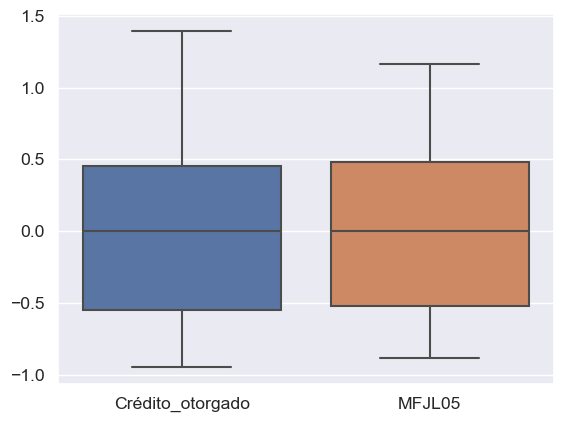

In [129]:
box =  sns.boxplot(rlsc[['Crédito_otorgado','MFJL05' ]])     #transformaciones permiten eliminar outliers y alcanzar simetría                             
plt.show()

In [130]:
from scipy.stats import levene

# Realizar la prueba de igualdad de varianzas de Levene PARA PODER REALIZAR UN ANOVA (p-value >0.05)
statistic, p_value = levene(rlsc['Crédito_otorgado'], rlsc['MFJL05'])

# Imprimir los resultados
print("Estadístico de Levene:", statistic)
print("Valor p:", p_value)             #p-value es significativo (p-value < 0.05) se rechaza H0 de que las varianzas SON IGUALES
                                       # SE DEBE OPTAR POR UN ANOVA NO PARAMÉTRICO K-W PARA ANALIZAR EL MODELO.


Estadístico de Levene: 39.602393552500914
Valor p: 3.3284578902629613e-10


In [131]:
from scipy.stats import kruskal

# Realizar el test ANOVA NO PARAMÉTRICO de Kruskal-Wallis
statistic, p_value = kruskal(rlsc['Crédito_otorgado'], rlsc['MFJL05'])

# Imprimir los resultados
print("Estadístico de Kruskal-Wallis:", statistic)
print("Valor p:", p_value) # p-value < 0.05 lo que permite decir que la media de MFJL05 es diferente de la media de Crédito
                           # lo que hace determinar su relación con la variable Crédito


Estadístico de Kruskal-Wallis: 4.368824983575792
Valor p: 0.036602223042805866


**El ANOVA no paramétrico K-W muestra que la variable "MFJL05" tiene un efecto significativo en la variable "Crédito_otorgado", ya que el valor p asociado con la estadística F es < 0.05. Esto sugiere que la variable "MFJL05" es un predictor importante de la variable "Crédito_otorgado"**.

Mean Squared Error (MSE): 0.1922223630972279
R^2 Score: 0.40550535033821533


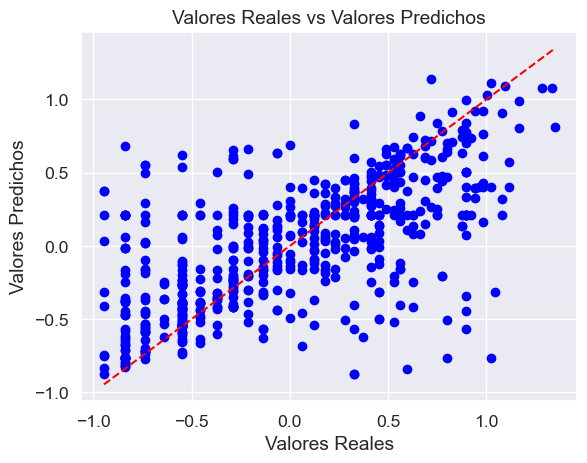

In [132]:

# se opta por utilizar un método de Regresión Robusta:  método de Regresión de Bosques Aleatorios

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Crear el DataFrame rlsc con las columnas seleccionadas
rlsc = df_model2[["Crédito_otorgado","MFJL05"]]

# Dividir los datos en características (X) y variable objetivo (y)
X = rlsc.drop("Crédito_otorgado", axis=1)
y = rlsc["Crédito_otorgado"]

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # 80% para entrenamiento y 20% prueba (aleatorio)

# Crear una instancia del modelo RandomForestRegressor
rf_regressor = RandomForestRegressor()

# Entrenar el modelo con los datos de entrenamiento
rf_regressor.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = rf_regressor.predict(X_test)

# Calcular las métricas de evaluación
mse = mean_squared_error(y_test, y_pred) # calcular error experimental y el R^2
r2 = r2_score(y_test, y_pred)

# Imprimir las métricas de evaluación
print('Mean Squared Error (MSE):', mse)
print('R^2 Score:', r2)



# Graficar los valores reales vs los valores predichos
plt.scatter(y_test, y_pred, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel('Valores Reales')
plt.ylabel('Valores Predichos')
plt.title('Valores Reales vs Valores Predichos')
plt.show()

In [133]:
from sklearn.model_selection import cross_val_score

# Crear una instancia del modelo RandomForestRegressor
rf_regressor = RandomForestRegressor()                    # validación cruzada del modelo

# Realizar la validación cruzada con 5 divisiones (k=5)
scores = cross_val_score(rf_regressor, X, y, cv=5, scoring='r2')

# Imprimir los resultados de validación cruzada
print('Resultados de Validación Cruzada:')
print(scores)
print('R^2 Promedio:', scores.mean())


Resultados de Validación Cruzada:
[ 0.7314023   0.46178378 -0.25426927  0.52231103  0.73482932]
R^2 Promedio: 0.43921143044585015


**El R^2 promedio obtenido es de aproximadamente 43.95%, lo que indica que el modelo tiene un rendimiento moderado en la explicación de la varianza de la variable objetivo (crédito) en los diferentes conjuntos de prueba utilizados en la validación cruzada**

In [134]:
import pandas as pd       # se crea un dataframe para visualizar los datos actuales y sus predicciones

# Crear el DataFrame df_predict con las columnas 'Actual' y 'Predicted'
df_predict = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

# Mostrar las primeras 10 filas del DataFrame
df_predict.head(10)

Actual  Predicted
1241 -0.371540  -0.166669
203   0.122172   0.101068
1260  0.326188  -0.402816
1626 -0.945755   0.208869
1578  0.452837   0.208869
102  -0.840134   0.208869
2925  0.452837  -0.008881
1582  0.230091   0.395635
485  -0.289567  -0.199733
1437 -0.547163  -0.470530

**Observamos que es poco preciso**

**Modelo de Regresión Lineal Múltiple**
------------------------------------------------------

In [146]:
rlm = df_model2[["Crédito_otorgado","Estado_civil","MFSEP05", "MFAG05","MFJN05", "MFJL05", "MFMY05","MFABR05","MPASEP05","MPA_AG05","MPAJN05","MPAJL05","MPAMY05","MPA_ABR05"]]
rlm.head(10) # creamos una variable que contenga las variables múltiples seleccionadas basados en el PCA

Crédito_otorgado  Estado_civil   MFSEP05    MFAG05    MFJN05    MFJL05  \
0         -0.840134          -1.0 -0.453089 -0.471270 -0.608249 -0.571517   
1          0.000000           0.0 -0.498578 -0.525431 -0.459199 -0.490182   
2         -0.211452           0.0  0.203328 -0.107942 -0.060679 -0.120694   
3         -0.547163          -1.0  0.446146  0.482907  0.253379  0.480700   
4         -0.547163          -1.0 -0.292076 -0.375464  0.109145  0.324879   
5         -0.547163           0.0  0.603883  0.565991  0.073426  0.554468   
6         -0.137171           0.0 -0.191962 -0.580256 -0.597699 -0.575212   
7          0.122172          -1.0 -0.209445 -0.106000 -0.125343 -0.163113   
8         -0.840134           0.0 -0.602682 -0.596095 -0.608249 -0.600682   
9          0.412670           0.0 -0.215788 -0.235480 -0.492424 -0.381382   

     MFMY05   MFABR05  MPASEP05  MPA_AG05   MPAJN05   MPAJL05   MPAMY05  \
0 -0.579701 -0.557060 -0.862302 -0.386424 -0.592467 -0.588460 -0.575932   
1 -0.420988 -0.399683 -0.862302 -0.251658 -0.061877 -0.042379 -0.575932   
2 -0.010721  0.048249 -0.161891 -0.063259 -0.061877 -0.042379 -0.061545   
3  0.293777  0.346551  0.000000  0.098052 -0.020151  0.040352 -0.033429   
4  0.099054  0.141230  0.000000  1.336301  0.995222  1.050851 -0.199535   
5  0.110248  0.162284  0.140365  0.038611 -0.061877 -0.203812 -0.061545   
6 -0.587433 -0.528425 -0.658271 -0.427121 -0.258228 -0.588460  0.180921   
7 -0.106559 -0.378972  0.325729 -0.736803 -0.061877 -0.323928 -0.061545   
8 -0.068268  0.000633 -0.862302 -0.736803  1.115591 -0.588460 -0.012430   
9 -0.493535 -0.378434  0.088973 -0.730061 -0.410477 -0.555466  0.586513   

   MPA_ABR05  
0  -0.495253  
1   0.308800  
2   0.737667  
3   0.000000  
4  -0.135998  
5  -0.082339  
6   0.186215  
7   0.000000  
8  -0.495253  
9  -0.455763

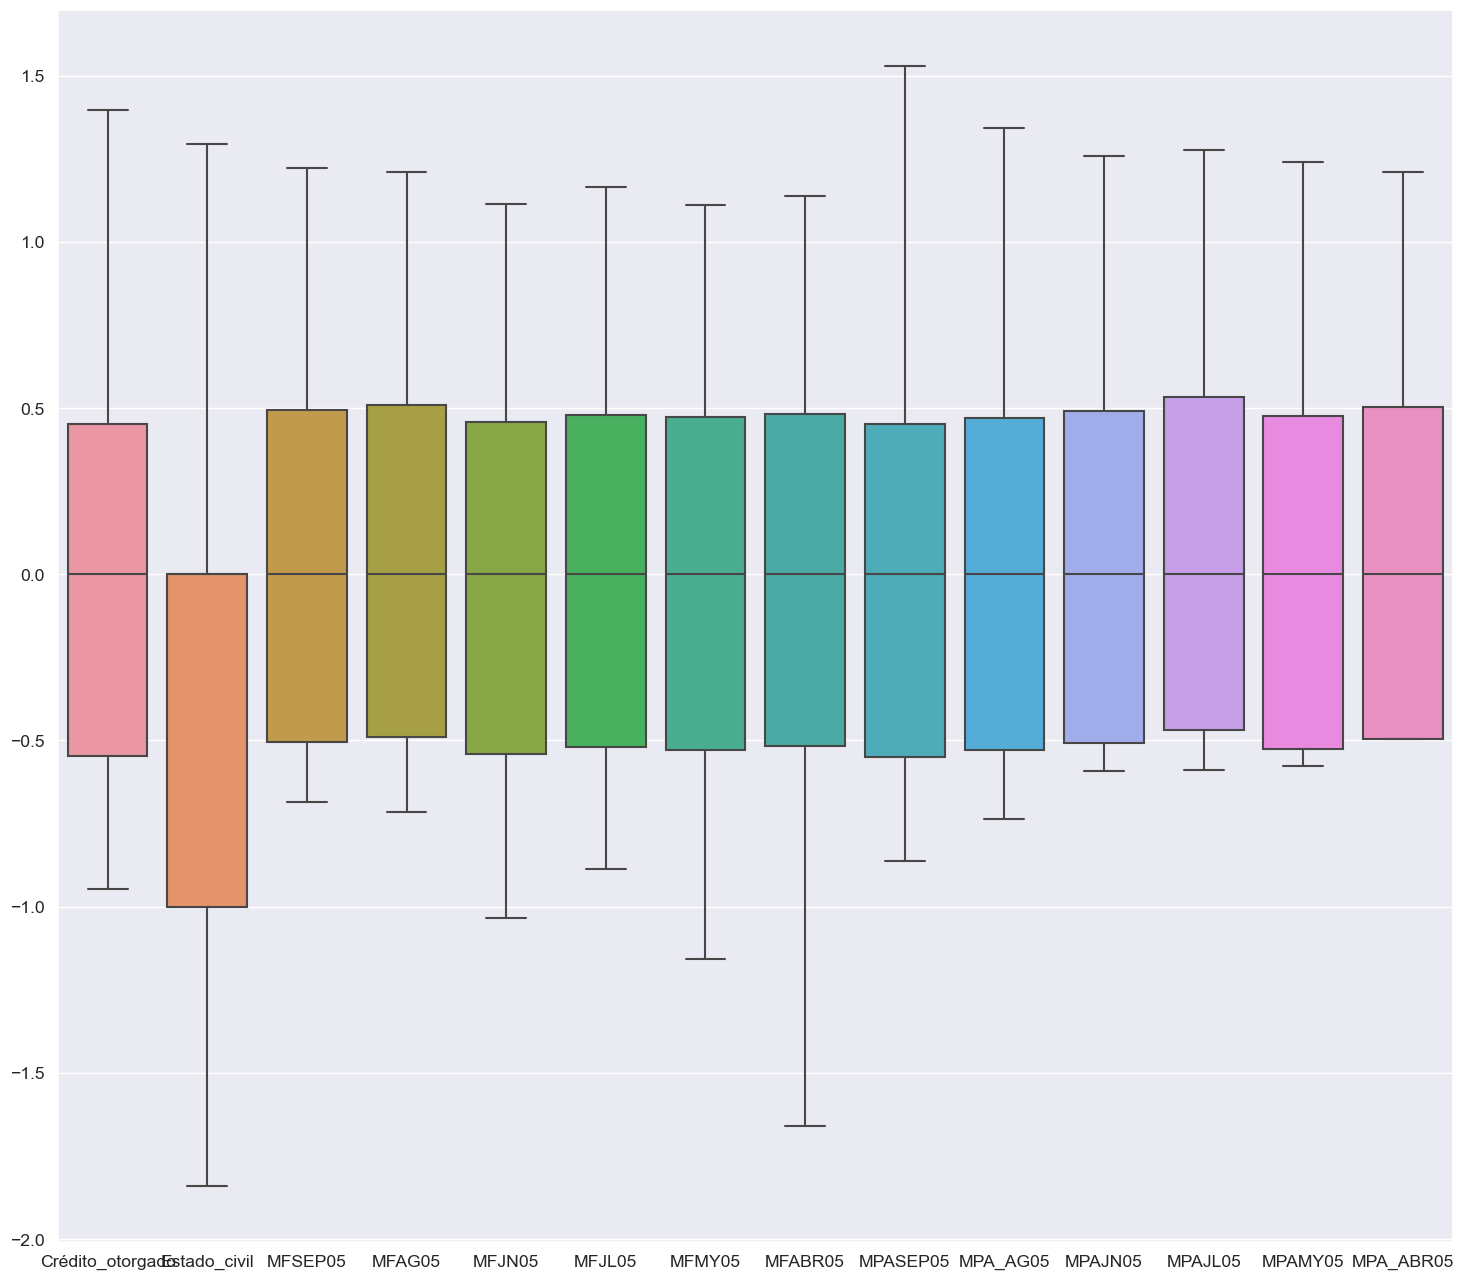

In [148]:
fig, ax = plt.subplots(1, 1, figsize=(18,16), dpi=100) # se logra eliminar los outliers y se logra simetría de los datos

graf = sns.boxplot(rlm[["Crédito_otorgado","Estado_civil","MFSEP05", "MFAG05","MFJN05", "MFJL05", "MFMY05","MFABR05","MPASEP05","MPA_AG05","MPAJN05","MPAJL05","MPAMY05","MPA_ABR05"]])

In [149]:
from scipy.stats import levene

# Variables a comparar
variables = ["Crédito_otorgado","Estado_civil","MFSEP05", "MFAG05","MFJN05", "MFJL05", "MFMY05","MFABR05","MPASEP05","MPA_AG05","MPAJN05","MPAJL05","MPAMY05","MPA_ABR05"]

# Realizar la prueba de igualdad de varianzas de Levene PARA PODER REALIZAR UN ANOVA (p-value >0.05)
statistic, p_value = levene(*[rlm[var] for var in variables])

# Imprimir los resultados
print("Estadístico de Levene:", statistic) #p-value es significativo (p-value < 0.05) se rechaza H0 de que las varianzas SON IGUALES
                                       # SE DEBE OPTAR POR UN ANOVA NO PARAMÉTRICO K-W PARA ANALIZAR EL MODELO.

print("Valor p:", p_value)


Estadístico de Levene: 15.189461340465312
Valor p: 5.548490041497349e-35


In [150]:
from scipy.stats import kruskal

# Realizar el test ANOVA NO PARAMÉTRICO de Kruskal-Wallis
statistic, p_value = kruskal(df_model['Crédito_otorgado'], df_model['Estado_civil'], df_model['MFSEP05'], df_model['MFAG05'], df_model['MFJL05'], df_model['MFJN05'], df_model['MFMY05'], df_model['MFABR05'], df_model['MPASEP05'], df_model['MPA_AG05'], df_model['MPAJN05'], df_model['MPAJL05'], df_model['MPAMY05'], df_model['MPA_ABR05'])

# Imprimir los resultados
print("Estadístico de Kruskal-Wallis:", statistic)
print("Valor p:", p_value) # p-value < 0.05 lo que permite decir que alguna de las medias de los grupos es diferente de las demás
                           # lo que hace suponer su relación la variable Crédito

Estadístico de Kruskal-Wallis: 18960.6997318041
Valor p: 0.0


**El ANOVA no paramétrico K-W muestra que las variables tienen un efecto significativo en la variable "Crédito_otorgado", ya que el valor p asociado con la estadística F es < 0.05. Esto sugiere que las variables son  predictores importantes de la variable "Crédito_otorgado"**.

Mean Squared Error (MSE): 0.09125011730574105
R^2 Score: 0.717786704703894


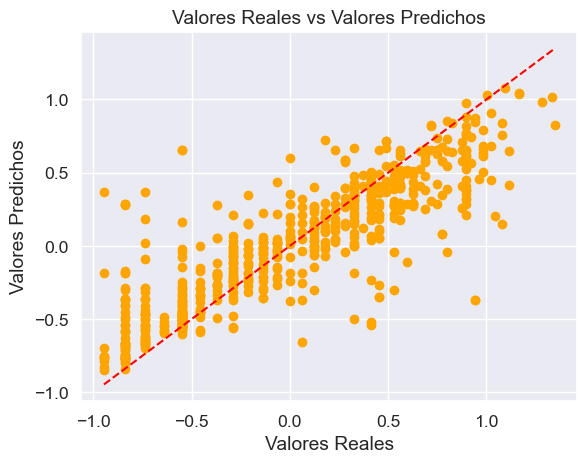

In [155]:

# se opta por utilizar un método de Regresión Robusta: el método de Regresión de Bosques Aleatorios

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Crear el DataFrame rlsc con las columnas seleccionadas
rlsc = df_model2[["Crédito_otorgado","Estado_civil","MFSEP05", "MFAG05","MFJN05", "MFJL05", "MFMY05","MFABR05","MPASEP05","MPA_AG05","MPAJN05","MPAJL05","MPAMY05","MPA_ABR05"]]

# Dividir los datos en características (X) y variable objetivo (y)
X = rlsc[["Estado_civil","MFSEP05", "MFAG05","MFJN05", "MFJL05", "MFMY05","MFABR05","MPASEP05","MPA_AG05","MPAJN05","MPAJL05","MPAMY05","MPA_ABR05"]]
y = rlsc["Crédito_otorgado"]

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear una instancia del modelo RandomForestRegressor
rf_regressor = RandomForestRegressor()

# Entrenar el modelo con los datos de entrenamiento
rf_regressor.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba   # modelo con un R2 de 71.78% para explicar la varianza de la variable objetivo crédito
y_pred = rf_regressor.predict(X_test)

# Calcular las métricas de evaluación
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Imprimir las métricas de evaluación
print('Mean Squared Error (MSE):', mse)
print('R^2 Score:', r2)



# Graficar los valores reales vs los valores predichos
plt.scatter(y_test, y_pred, color='orange')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel('Valores Reales')
plt.ylabel('Valores Predichos')
plt.title('Valores Reales vs Valores Predichos')
plt.show()

In [156]:
from sklearn.model_selection import cross_val_score

# Crear una instancia del modelo RandomForestRegressor
rf_regressor = RandomForestRegressor()

# Realizar la validación cruzada con 5 divisiones (k=5)
scores = cross_val_score(rf_regressor, X, y, cv=5, scoring='r2')

# Imprimir los resultados de validación cruzada
print('Resultados de Validación Cruzada:')
print(scores)
print('R^2 Promedio:', scores.mean())


Resultados de Validación Cruzada:
[0.89780966 0.75892456 0.32002164 0.75706347 0.90304758]
R^2 Promedio: 0.7273733821507689


**El R^2 promedio obtenido es de aproximadamente 72.73%, lo que indica que el modelo tiene un buen rendimiento en la explicación de la varianza de la variable objetivo (crédito) en los diferentes conjuntos de prueba utilizados en la validación cruzada**

**Porcentaje de cambio entre los rendimientos de los 2 modelos:** 

((72.73% - 43.92%) / 72.73%) * 100

= (28.81% / 72.73%) * 100

= 0.3961 * 100

= 39.6%

**Modelo de regresión múltiple parece ser mejor que el de regresión simple debido a su porcentaje de cambio un +39.6% con respecto al modelo de regresión simple**

In [157]:
import pandas as pd        # se crea un dataframe para visualizar los datos actuales y sus predicciones

# Crear el DataFrame df_predict con las columnas 'Actual' y 'Predicted'
df_predict = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

# Mostrar las primeras 10 filas del DataFrame
df_predict.head(10)


Actual  Predicted
1241 -0.371540  -0.366089
203   0.122172  -0.026093
1260  0.326188  -0.001564
1626 -0.945755  -0.187717
1578  0.452837   0.401637
102  -0.840134   0.287077
2925  0.452837   0.291103
1582  0.230091   0.126480
485  -0.289567  -0.221232
1437 -0.547163  -0.442462

**Potencia del modelo**
--------------------------------

In [158]:
from statsmodels.stats.power import tt_ind_solve_power

# Especificar los parámetros para el cálculo de potencia
effect_size = 0.5  # Tamaño del efecto esperado     # calculamos la potencia o poder de refutar H0 y asegurar que el modelo es
                                                    # es capaz de detectar efectos o relaciones verdaderas en los datos (signif)
alpha = 0.05  # Nivel de significancia
nobs = len(X)  # Tamaño de la muestra

# Calcular la potencia
power = tt_ind_solve_power(effect_size=effect_size, nobs1=nobs, alpha=alpha)

print("Potencia del análisis de regresión:", power)


Potencia del análisis de regresión: 1.0


**Conclusiones**: 
-----------------------

**El modelo tiene capacidad para detectar efectos significativos en los datos pero no es robustamente preciso en la predicción de resultados o datos esperados cuando se utiliza la regresión simple. Es por ello que el modelo más conveniente sería el modelo de regresión múltiple RFM (rendimiento del R^2 del 73% y una correlación r del 85% ) basado en métodos estadísticos no paramétricos debido a la naturaleza de los datos. Sólo evaluamos la potencia de la prueba, ya que al ser análisis no paramétricos se descartar analizar los supuestos de los residuales (normalidad, homocedasticidad e independencia) aplicables sólo a datos o análisis paramétricos**

**In God we trust all others bring me data -Eduard Deming-**